In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006

In [3]:
def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE
                  ).reshape((BATCH_SIZE, TIME_STEPS))/(10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    return [seq[:,:,np.newaxis], res[:,:,np.newaxis], xs]

In [4]:
model = Sequential()

model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    output_dim=CELL_SIZE,
    return_sequences=True, # 每一个输入都对应一个输出
    stateful=True, # 每一个点的当前输出都受前面所有输出影响
))
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))

adam = Adam(LR)
model.compile(optimizer=adam, loss='mse',)

W0718 22:17:00.307516  8668 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

D:\Anaconda3\envs\mlcc\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(50, 20, 1..., return_sequences=True, stateful=True, units=20)`
  import sys
W0718 22:17:00.340427  8668 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 22:17:00.423207  8668 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 22:17:00.961773  8668 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\

Training-------------------


W0718 22:17:01.322551  8668 deprecation.py:323] From D:\Anaconda3\envs\mlcc\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0718 22:17:01.767360  8668 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0718 22:17:01.887041  8668 deprecation_wrapper.py:119] From D:\Anaconda3\envs\mlcc\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



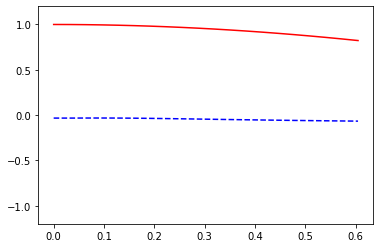

train cost:  0.50940645


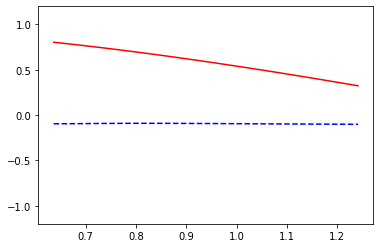

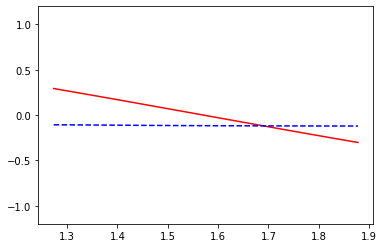

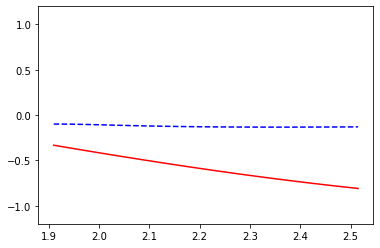

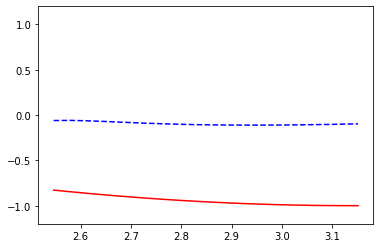

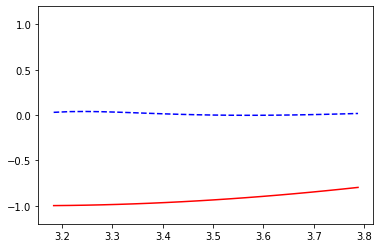

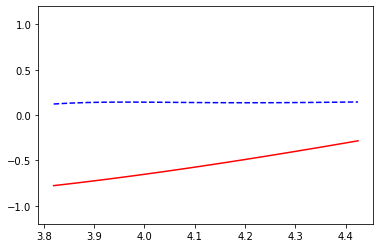

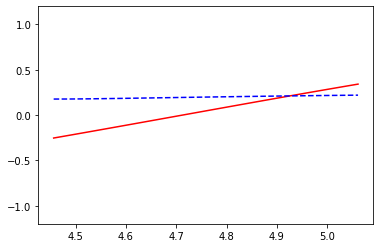

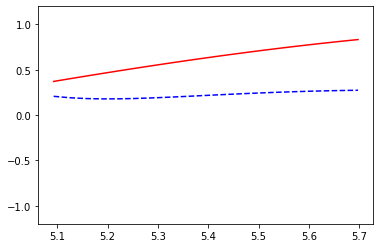

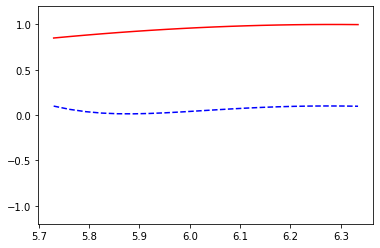

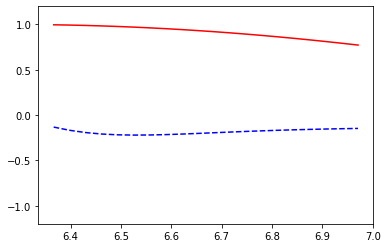

train cost:  0.36354724


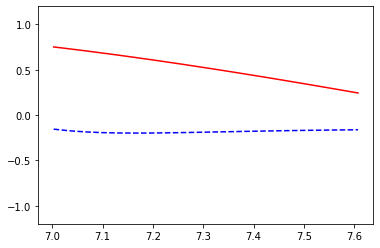

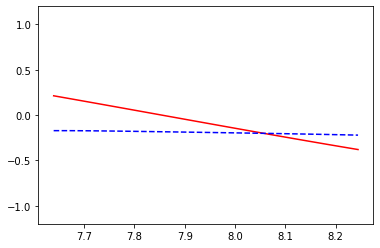

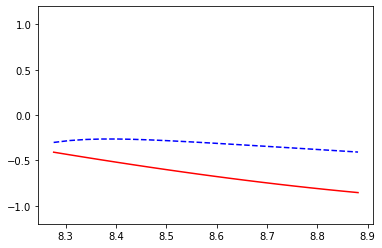

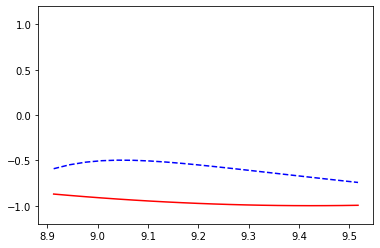

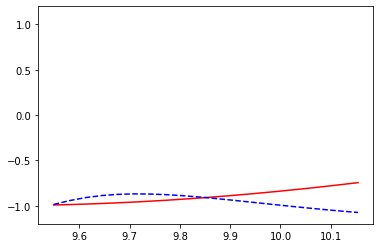

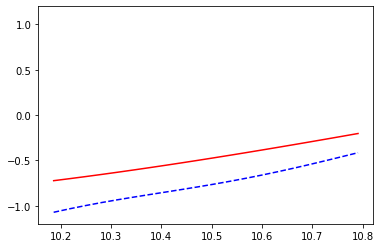

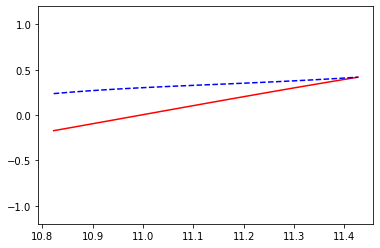

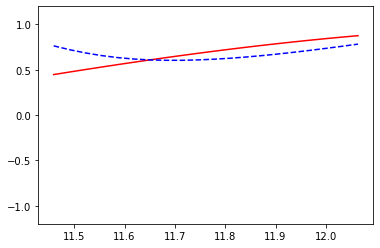

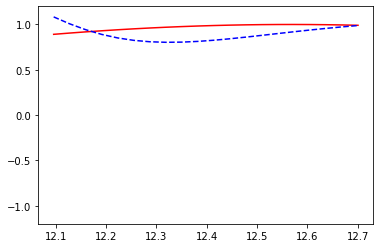

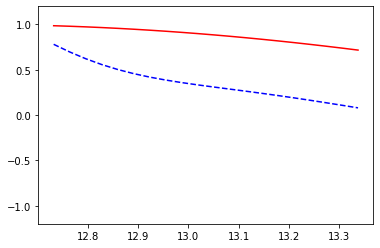

train cost:  0.062080406


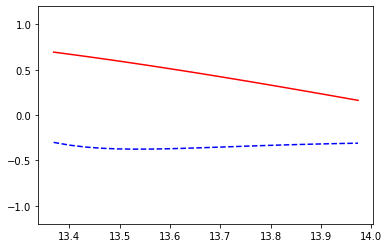

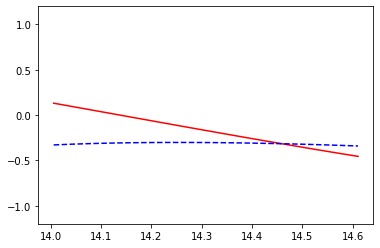

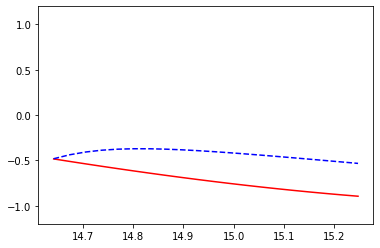

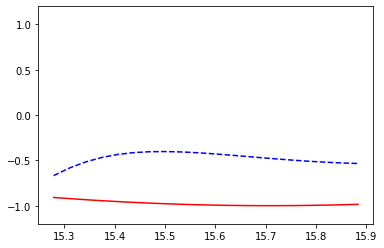

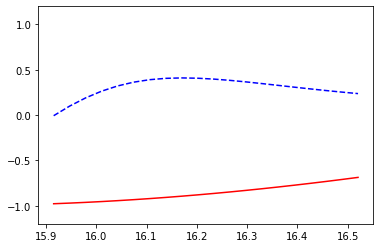

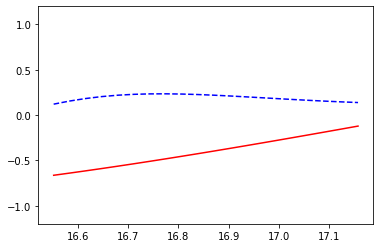

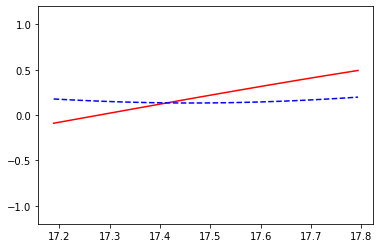

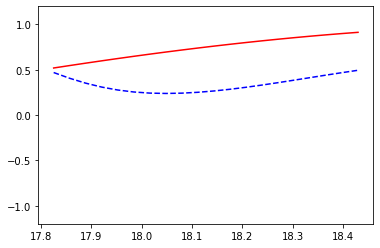

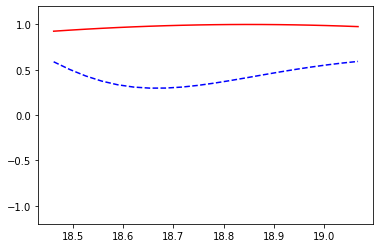

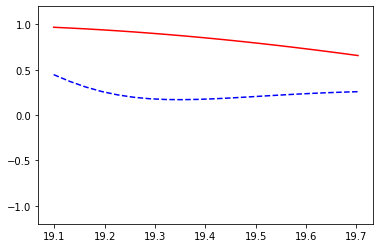

train cost:  0.117072955


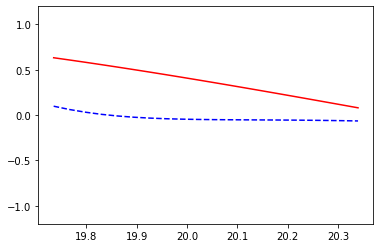

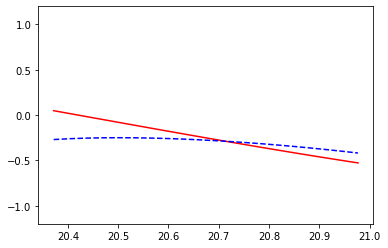

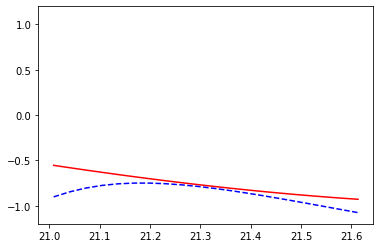

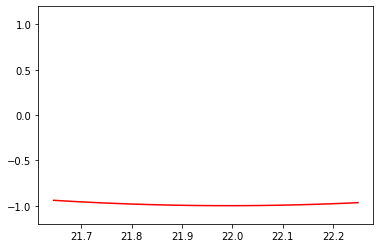

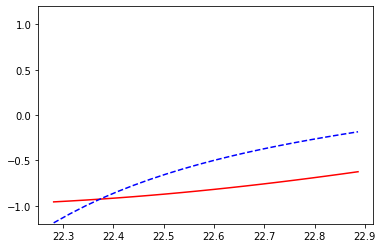

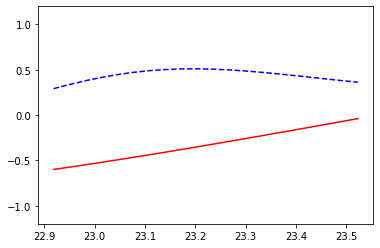

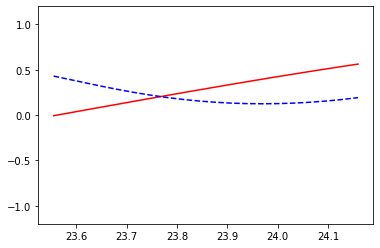

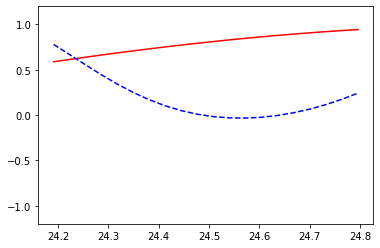

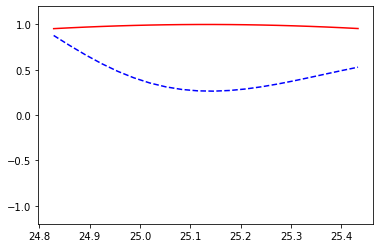

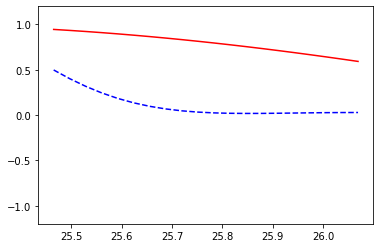

train cost:  0.0990153


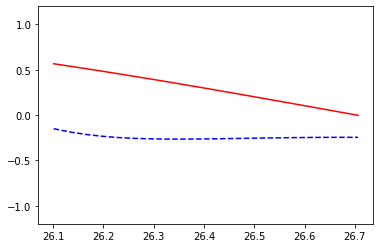

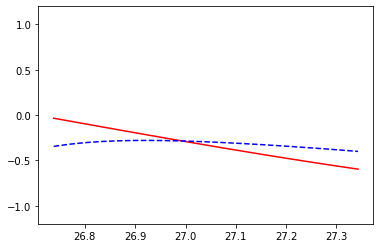

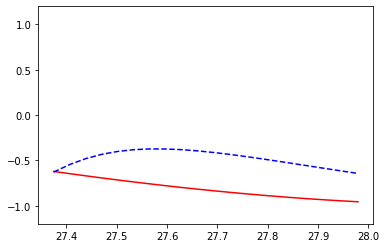

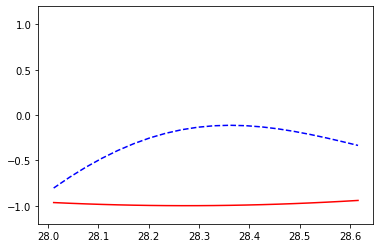

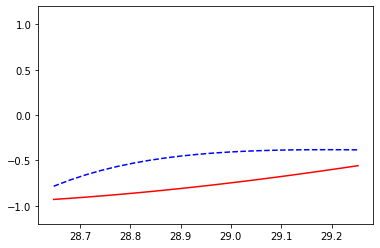

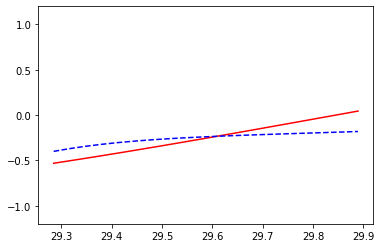

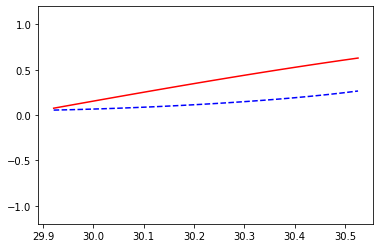

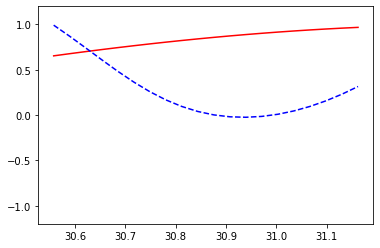

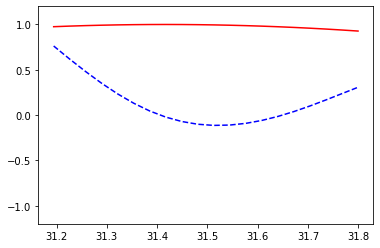

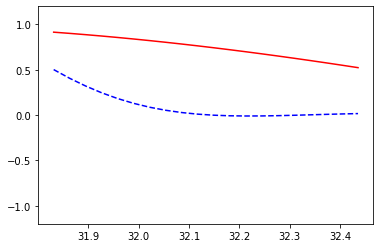

train cost:  0.094158724


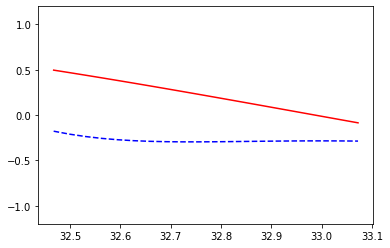

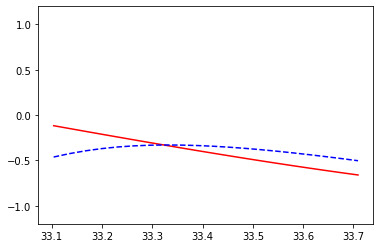

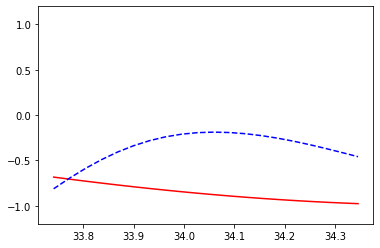

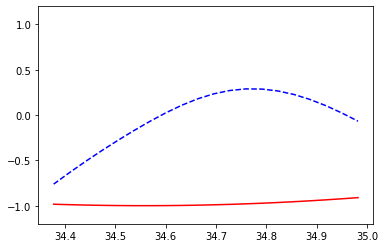

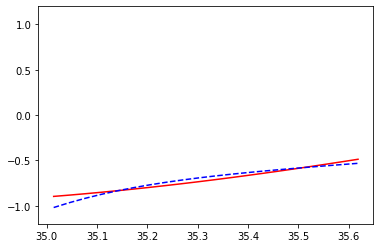

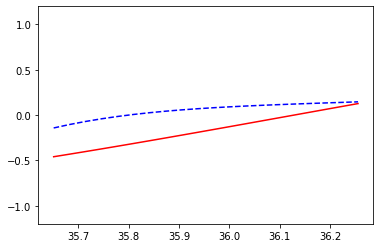

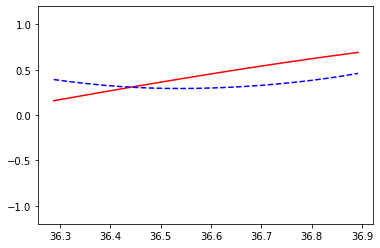

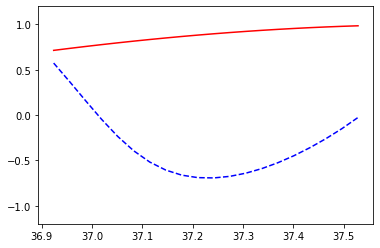

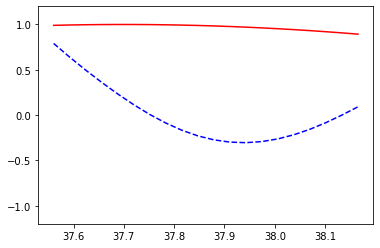

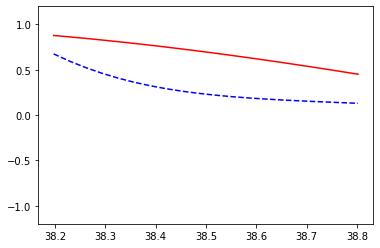

train cost:  0.06326361


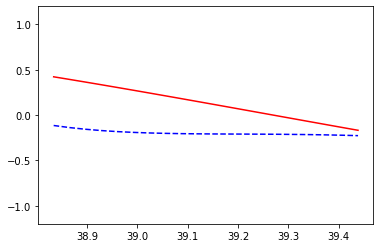

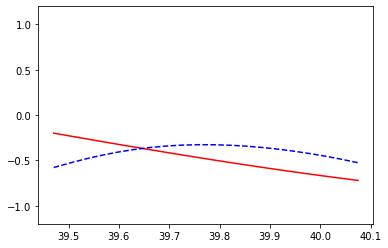

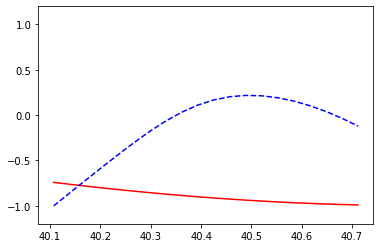

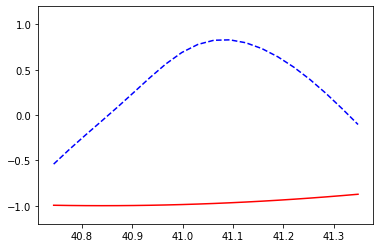

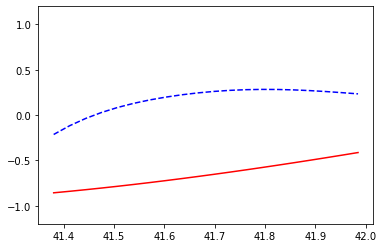

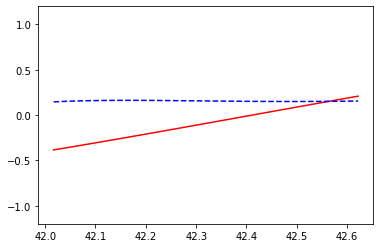

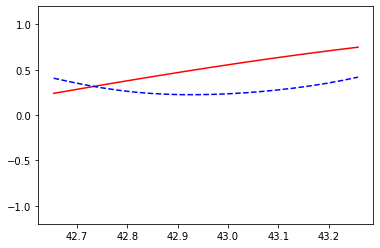

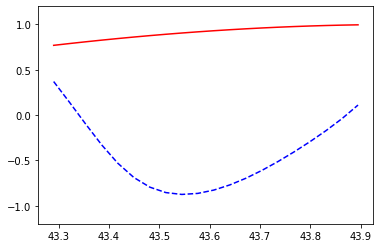

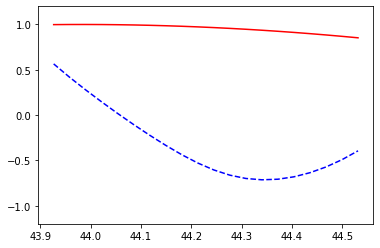

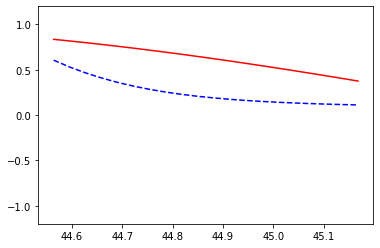

train cost:  0.06869431


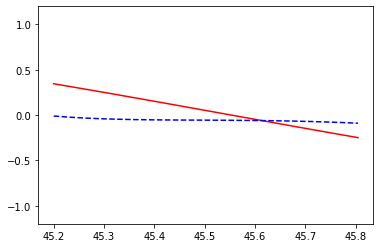

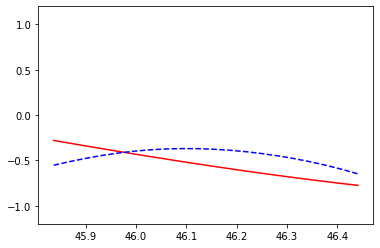

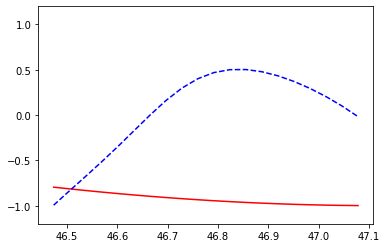

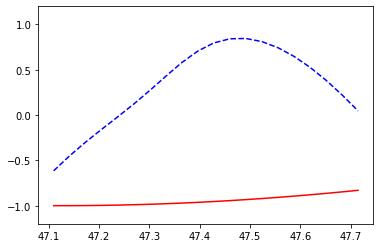

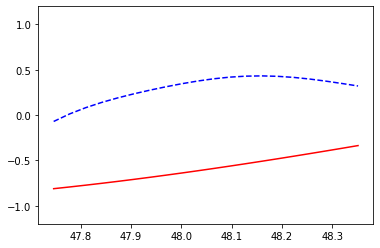

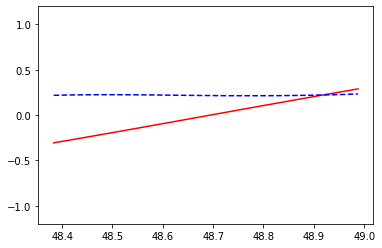

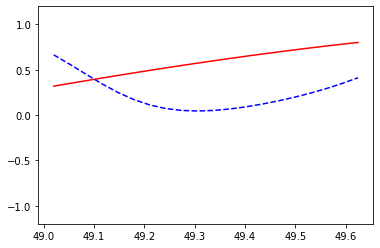

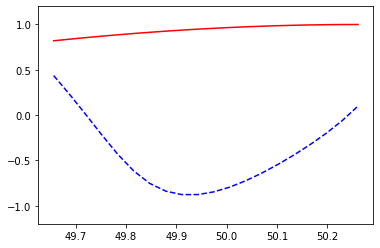

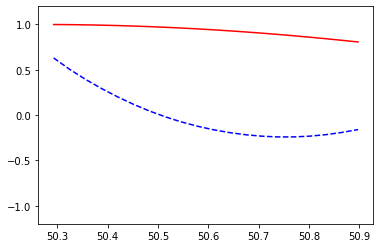

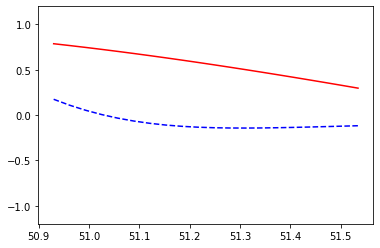

train cost:  0.06594962


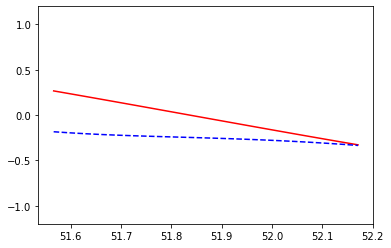

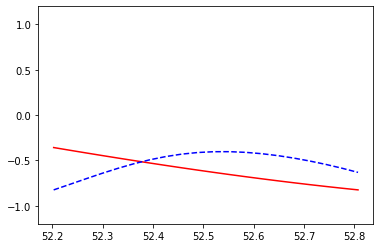

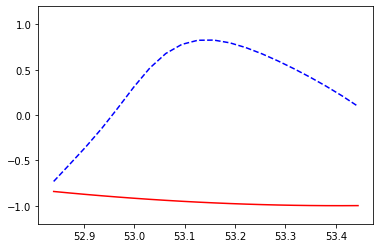

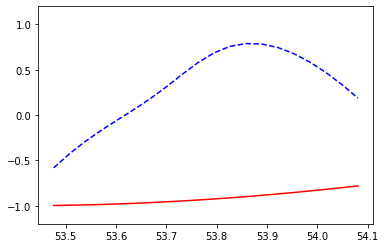

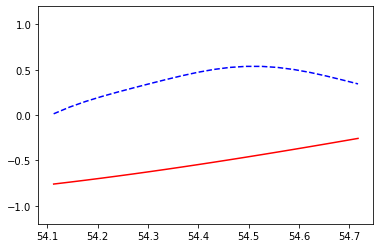

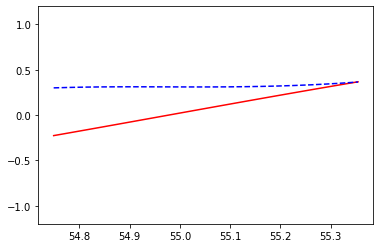

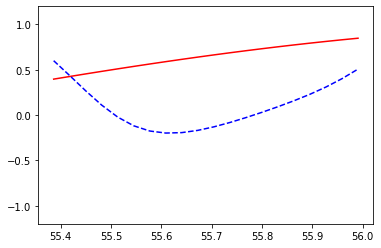

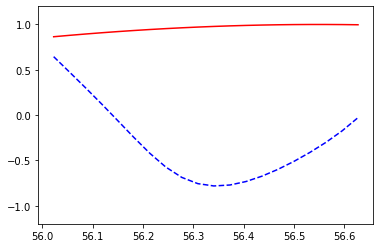

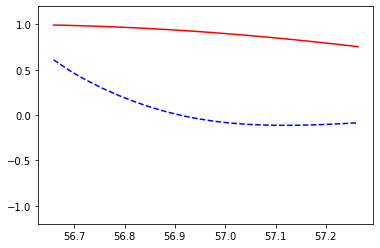

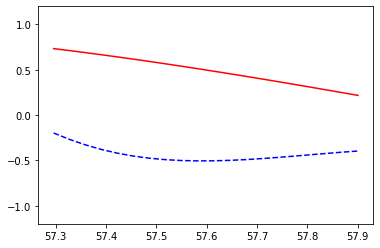

train cost:  0.0750309


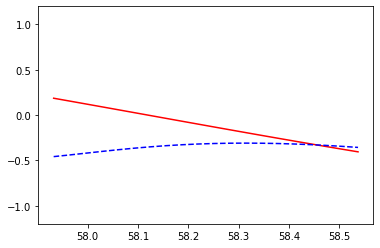

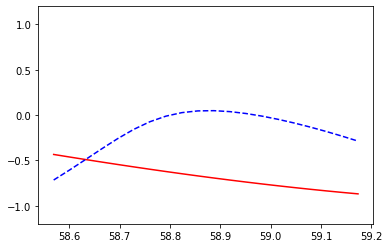

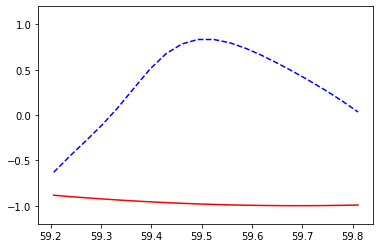

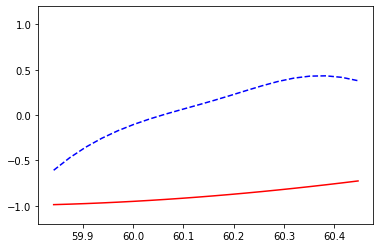

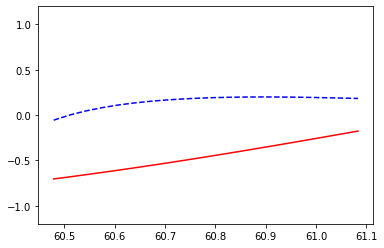

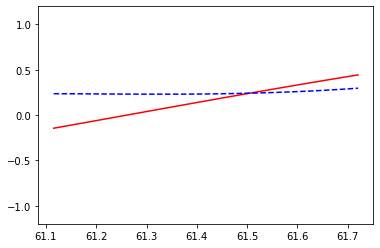

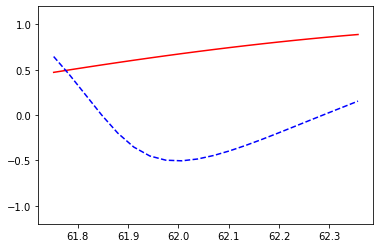

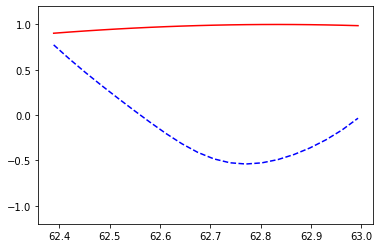

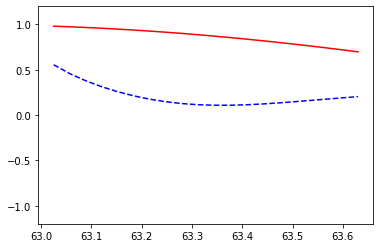

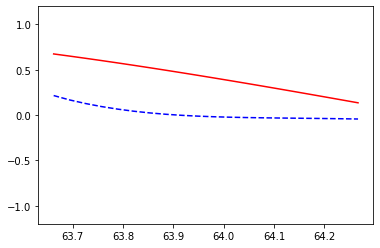

train cost:  0.10245262


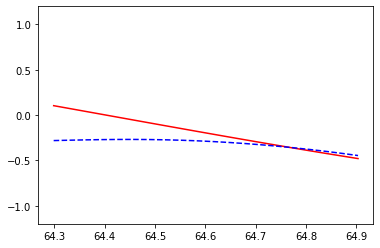

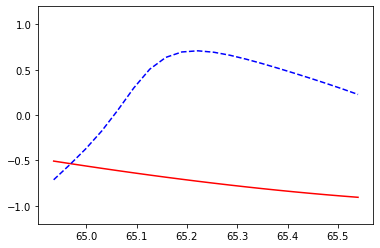

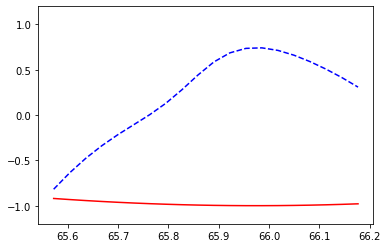

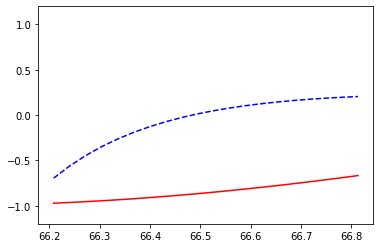

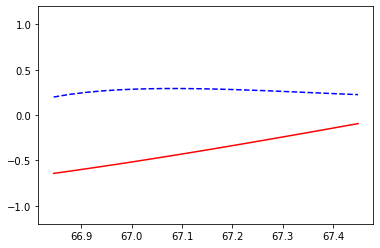

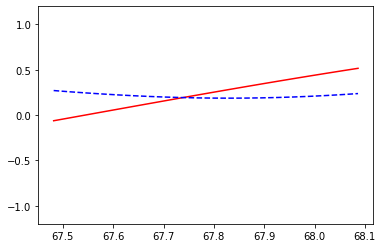

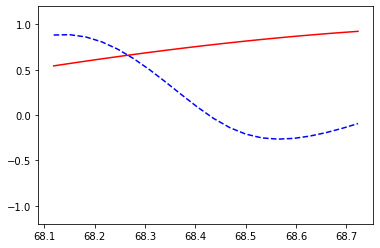

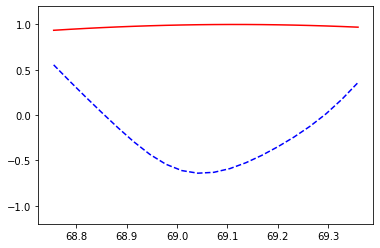

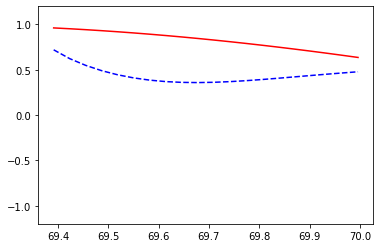

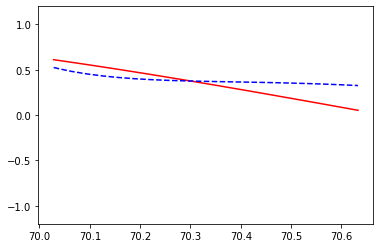

train cost:  0.13647388


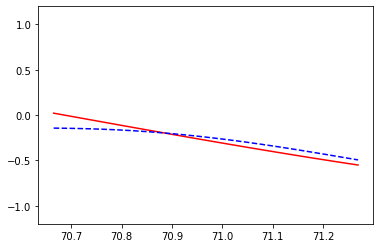

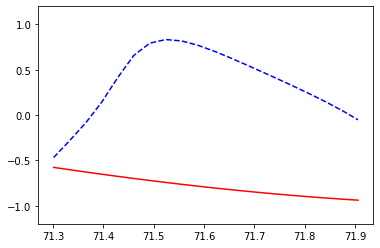

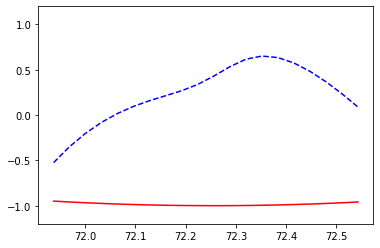

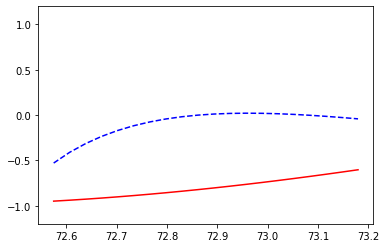

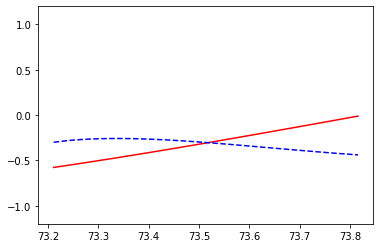

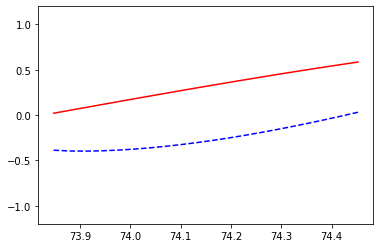

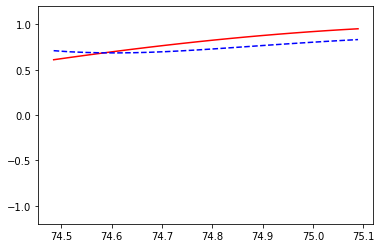

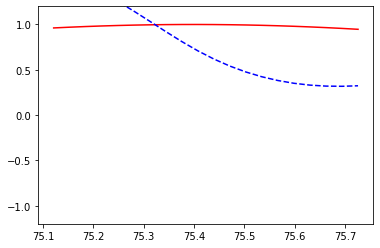

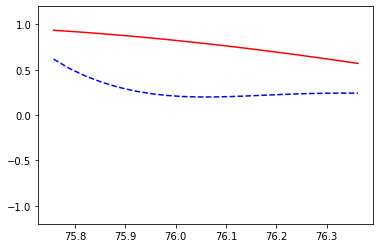

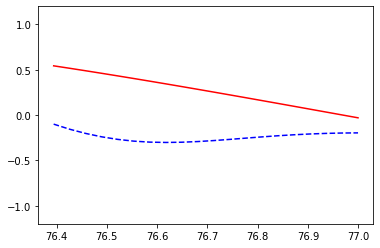

train cost:  0.098636486


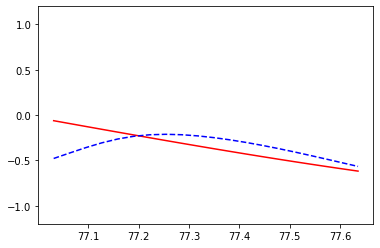

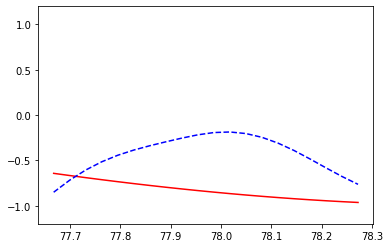

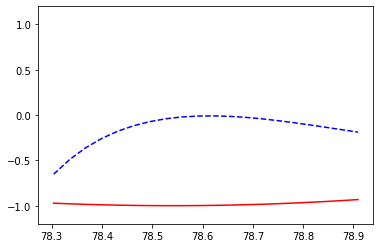

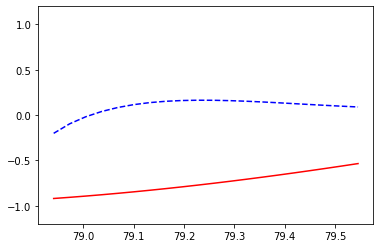

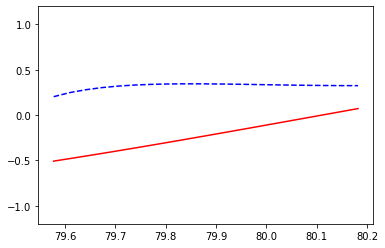

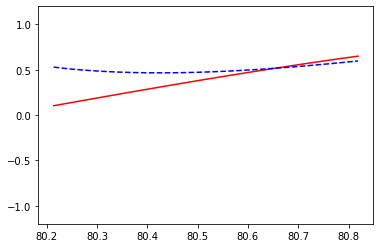

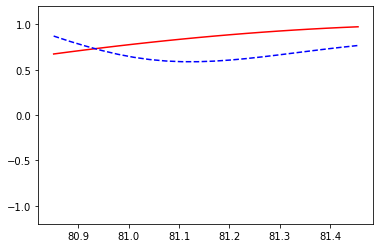

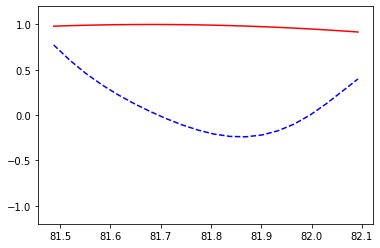

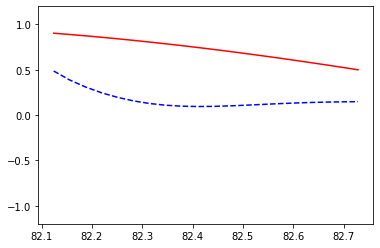

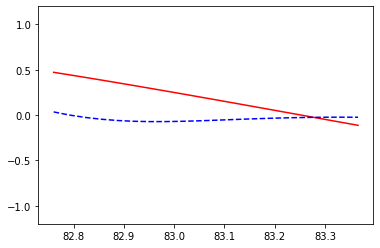

train cost:  0.057009578


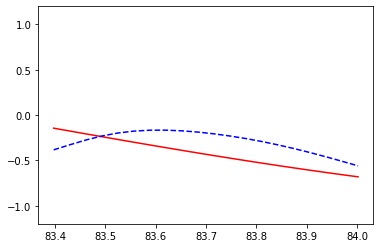

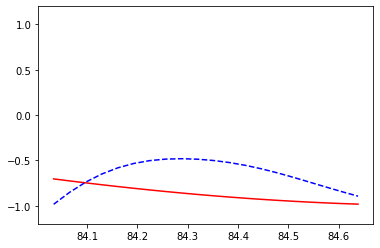

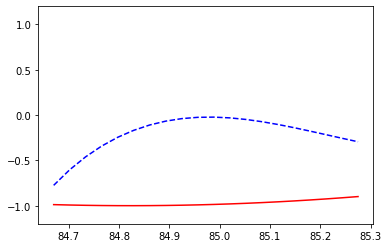

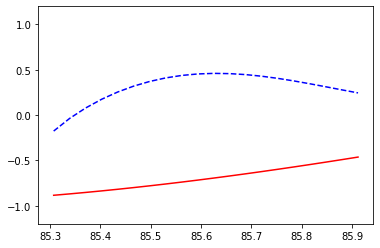

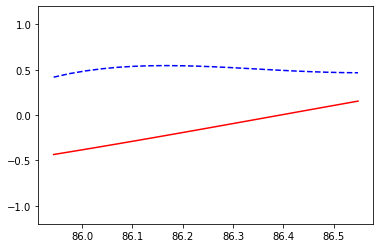

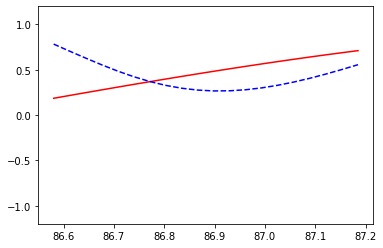

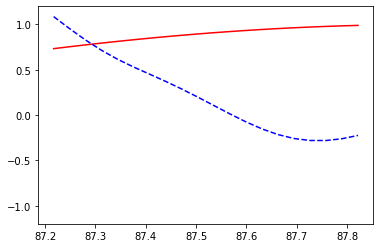

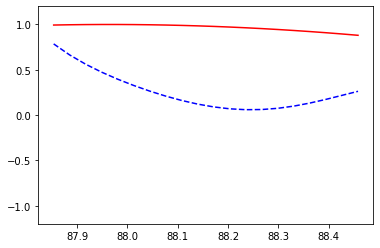

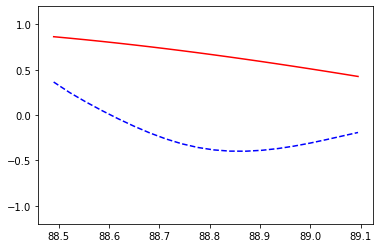

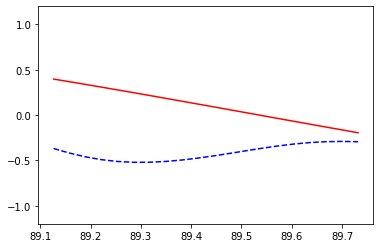

train cost:  0.044717908


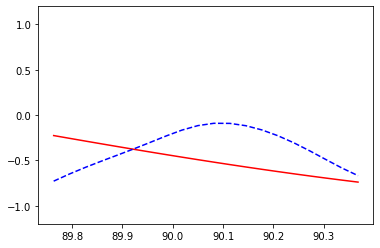

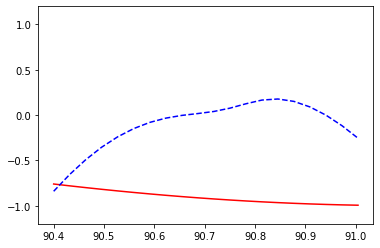

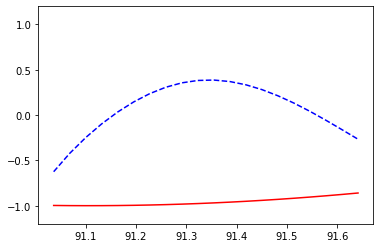

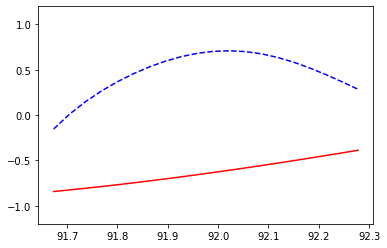

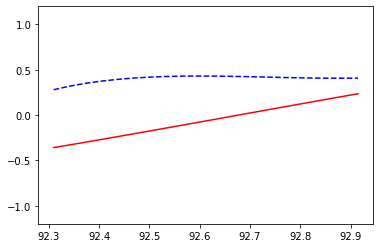

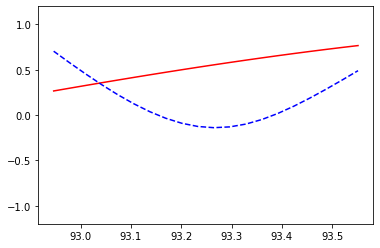

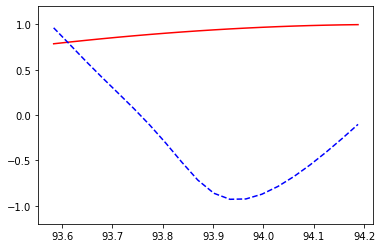

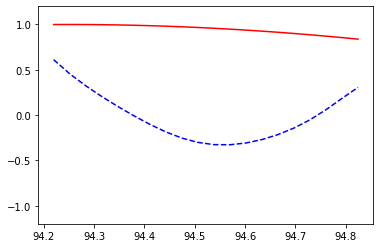

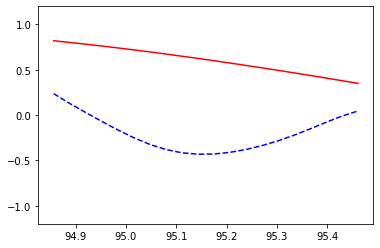

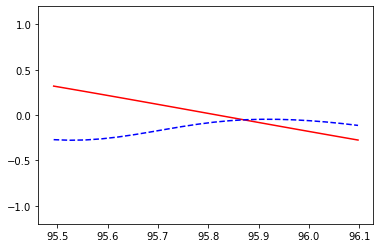

train cost:  0.028074546


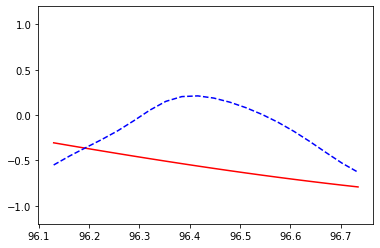

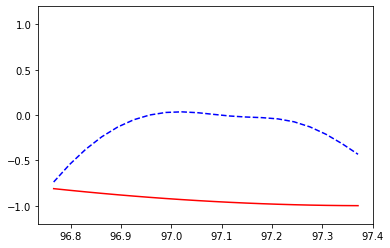

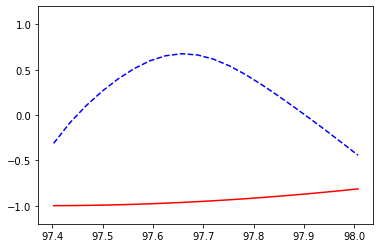

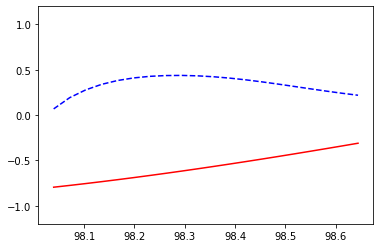

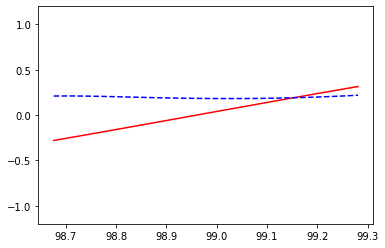

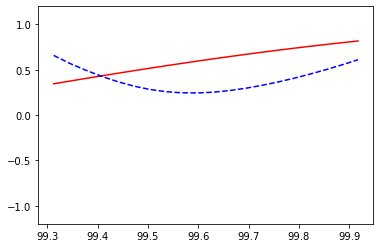

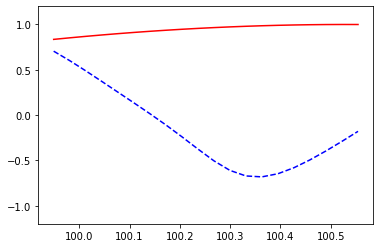

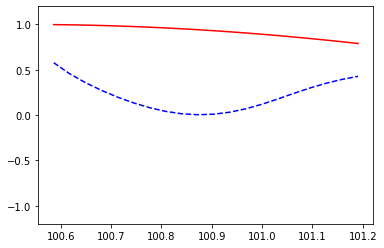

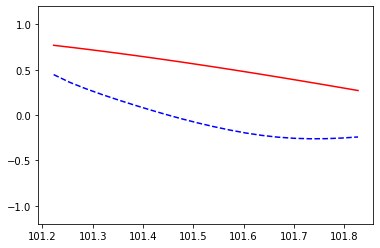

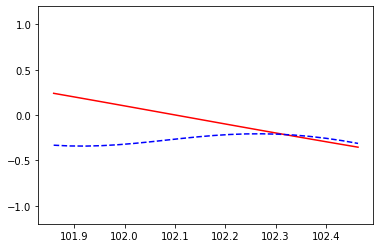

train cost:  0.03662081


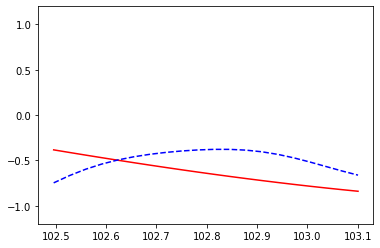

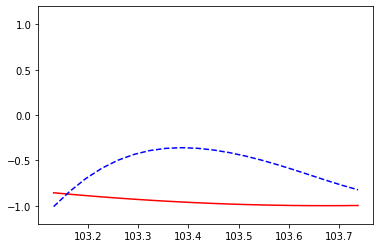

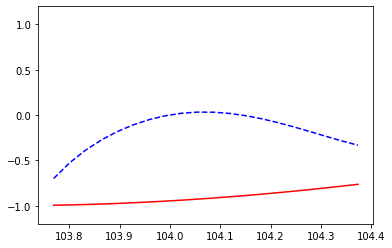

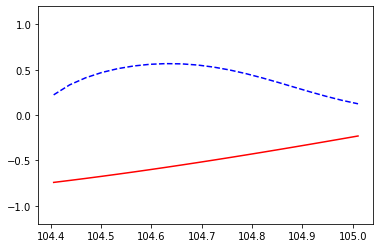

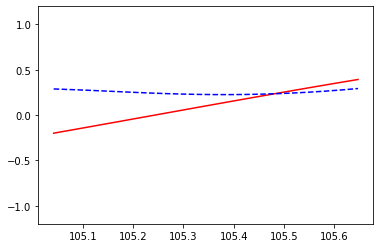

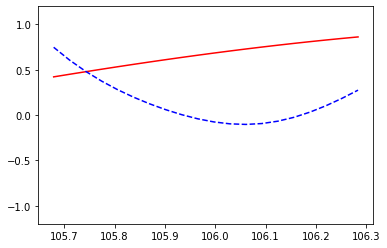

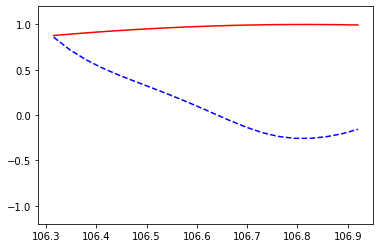

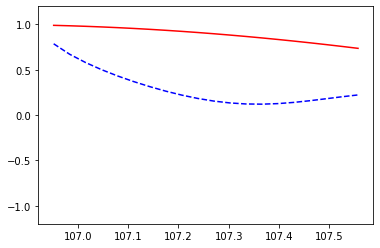

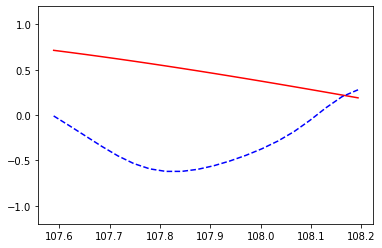

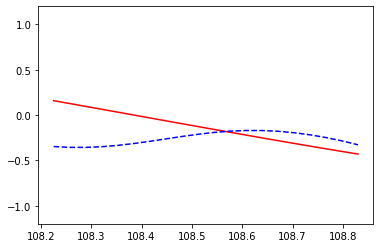

train cost:  0.06408945


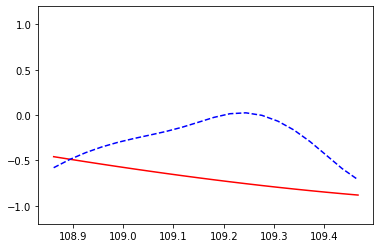

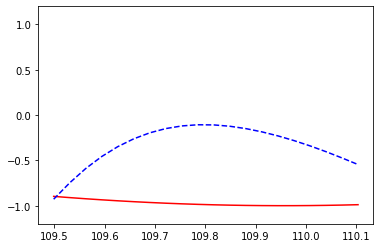

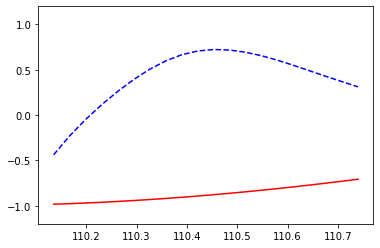

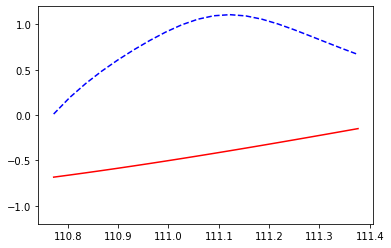

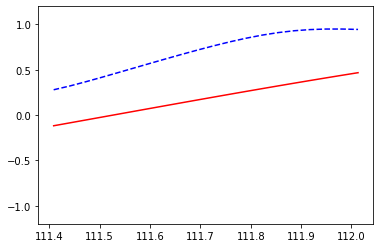

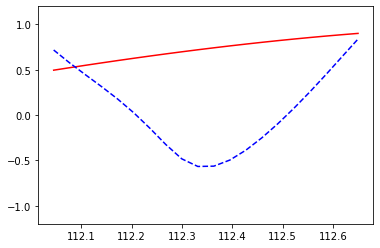

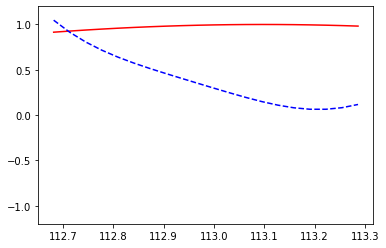

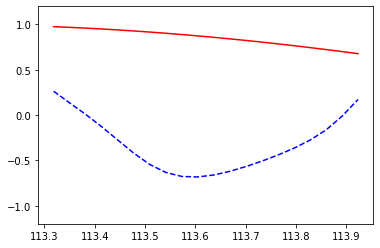

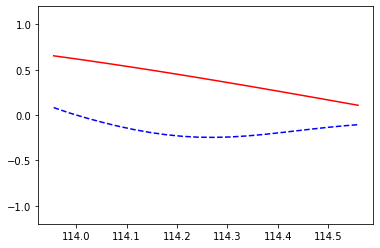

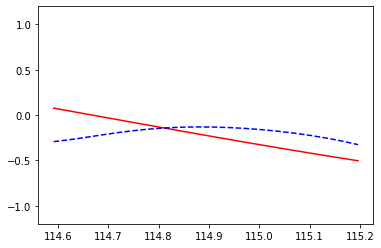

train cost:  0.03584169


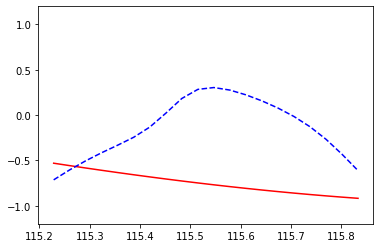

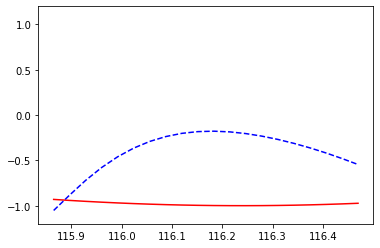

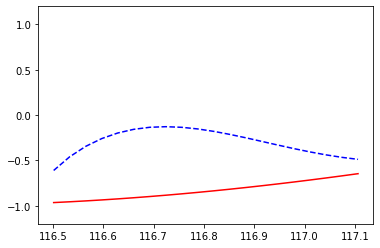

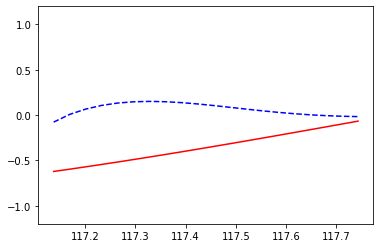

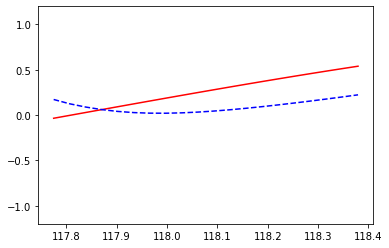

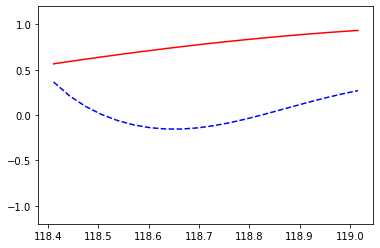

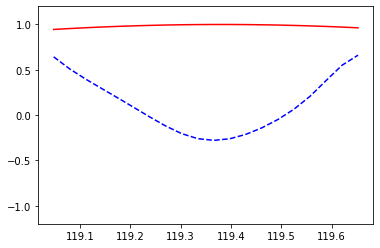

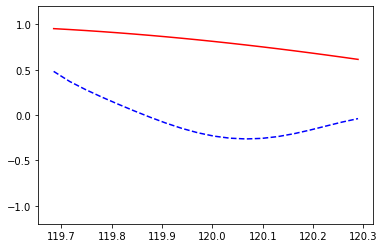

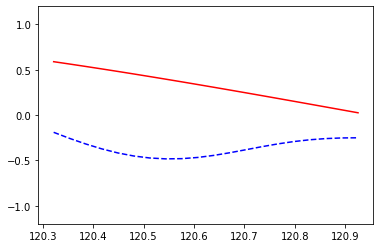

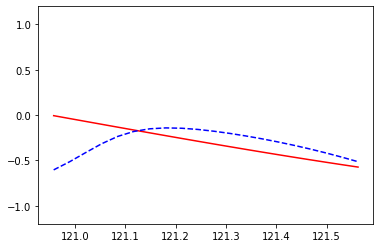

train cost:  0.06243846


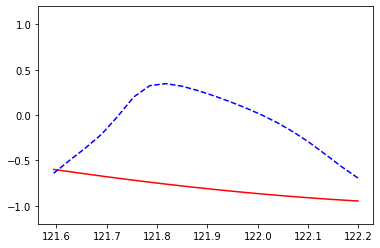

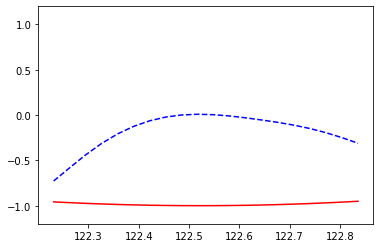

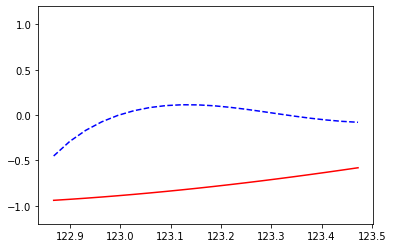

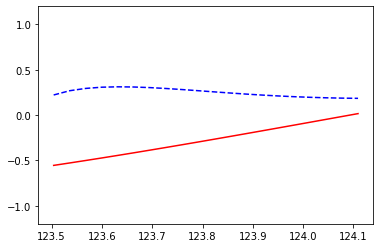

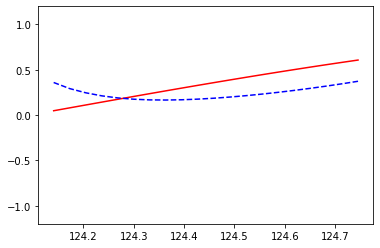

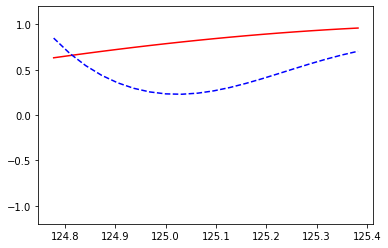

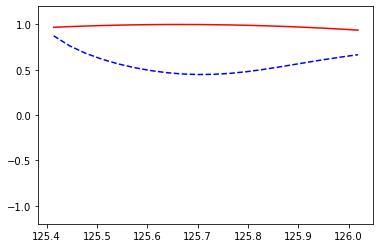

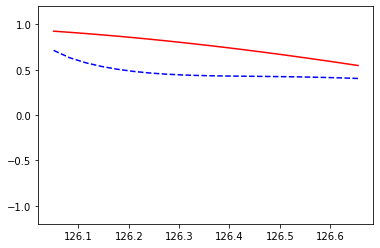

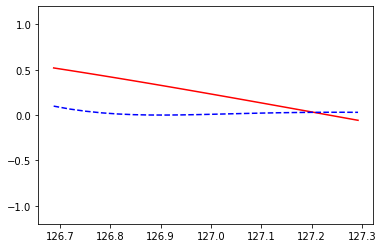

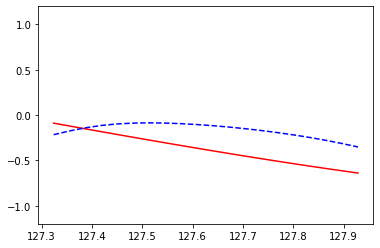

train cost:  0.05471523


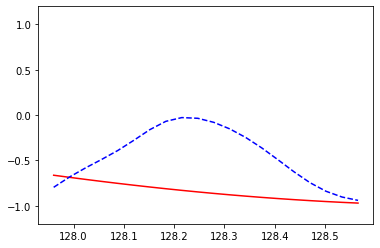

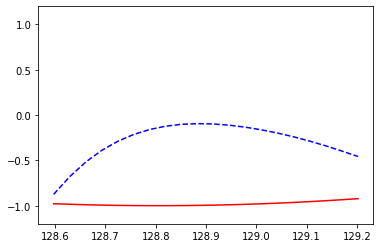

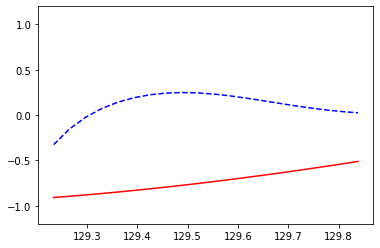

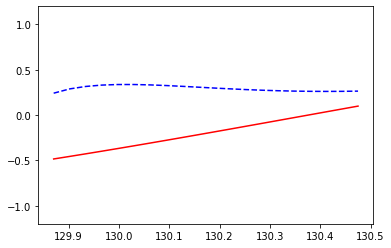

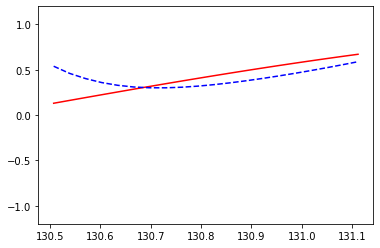

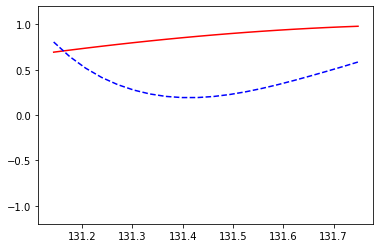

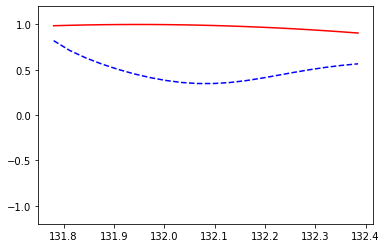

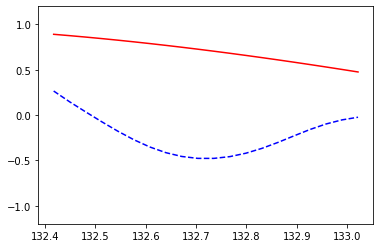

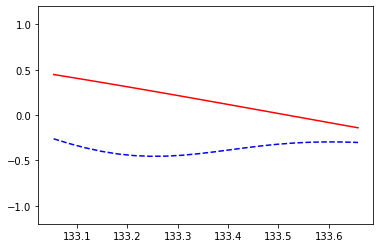

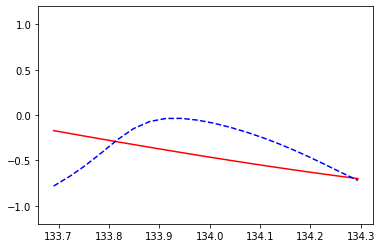

train cost:  0.03648889


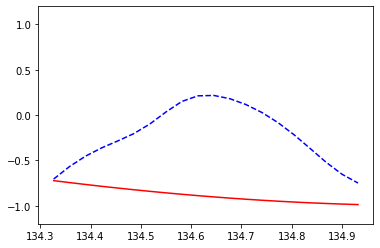

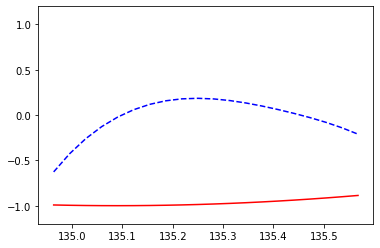

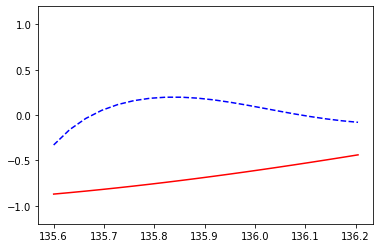

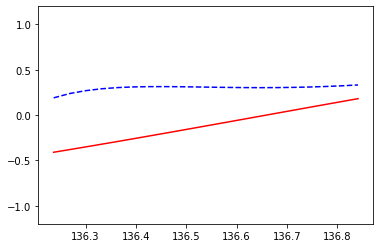

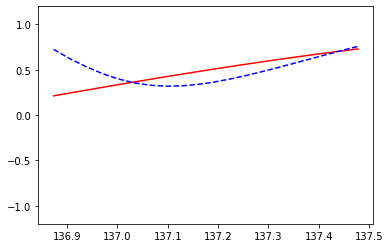

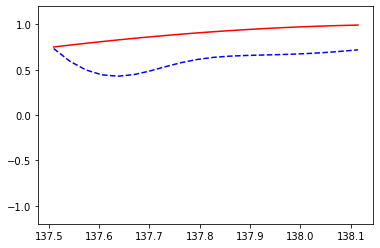

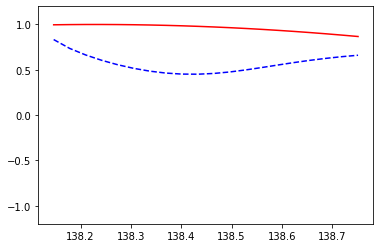

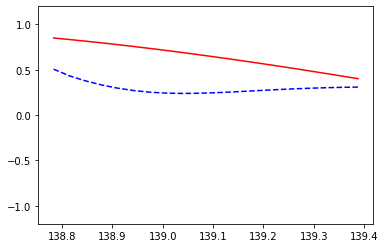

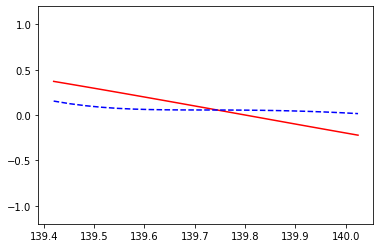

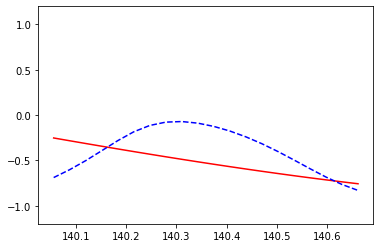

train cost:  0.025388233


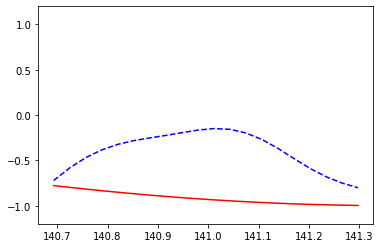

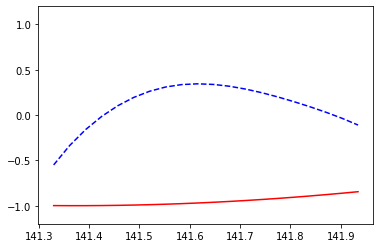

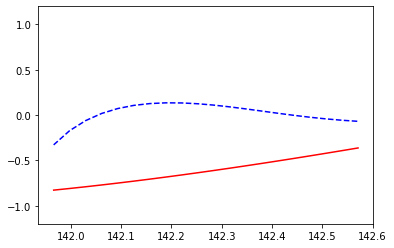

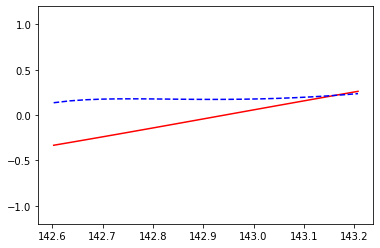

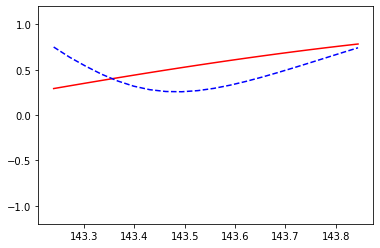

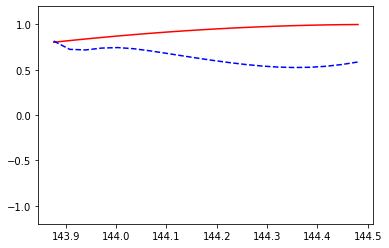

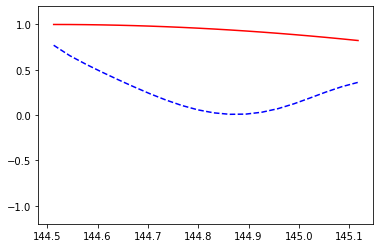

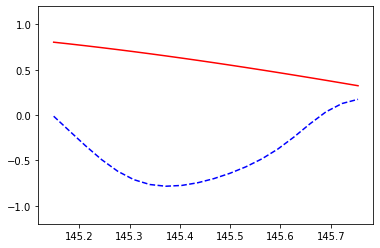

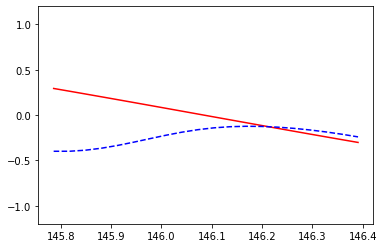

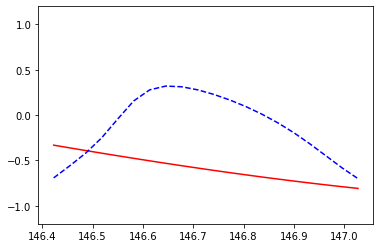

train cost:  0.027165998


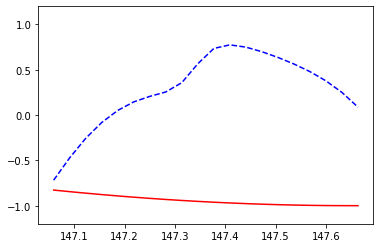

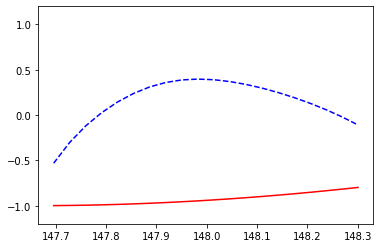

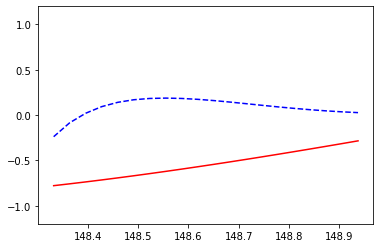

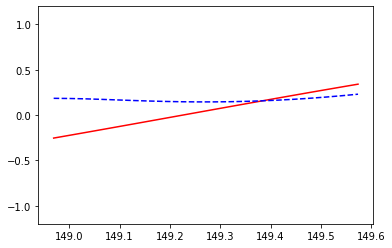

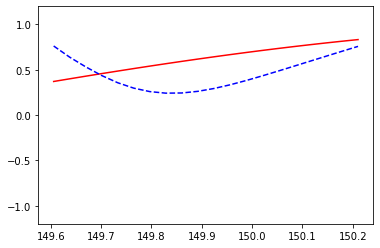

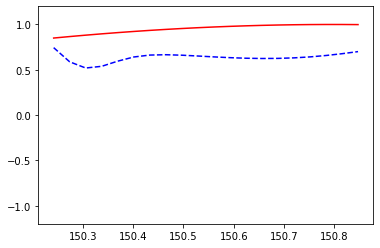

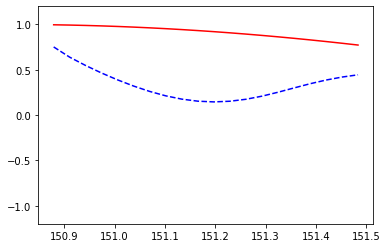

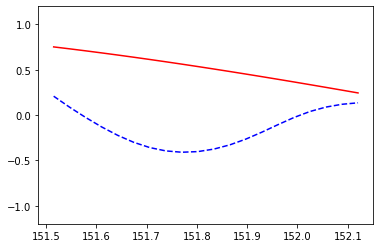

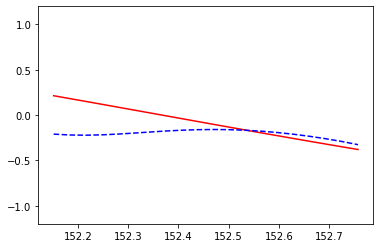

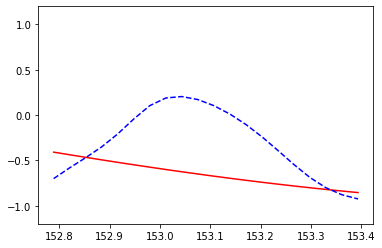

train cost:  0.029596085


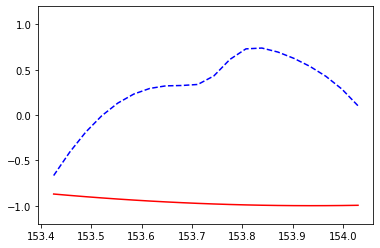

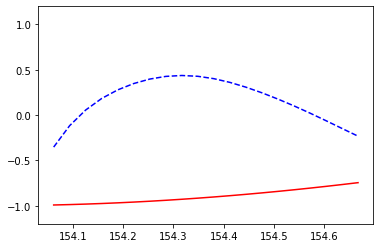

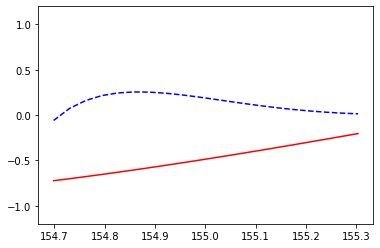

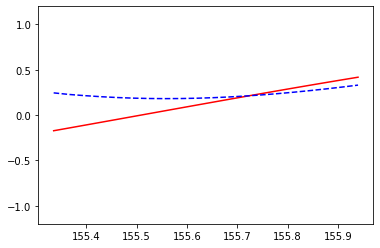

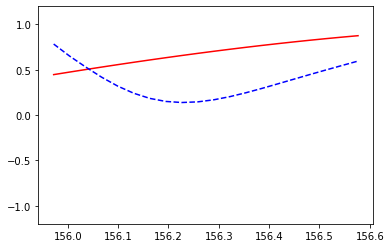

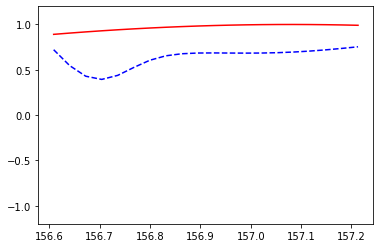

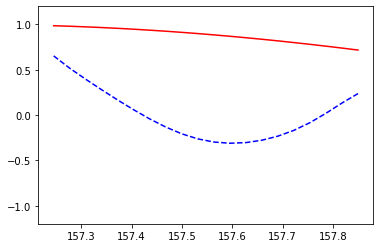

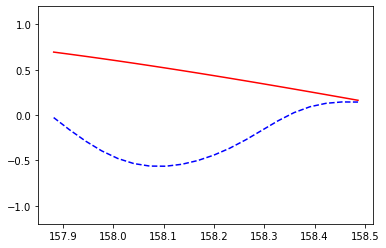

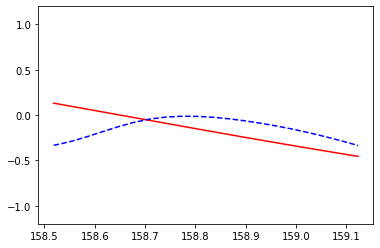

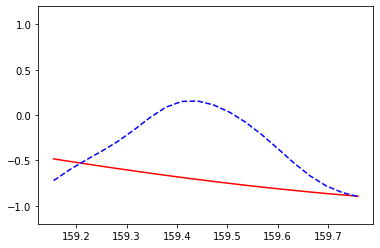

train cost:  0.02926032


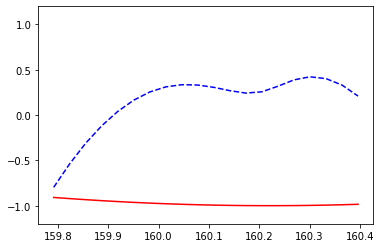

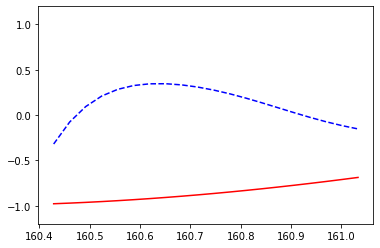

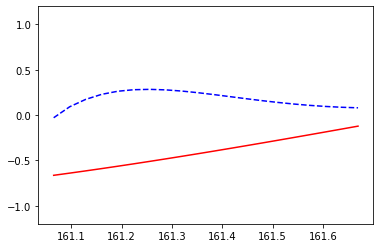

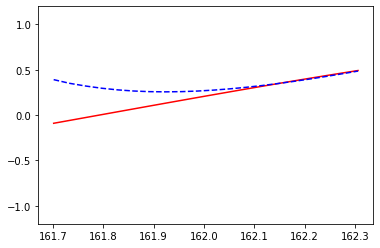

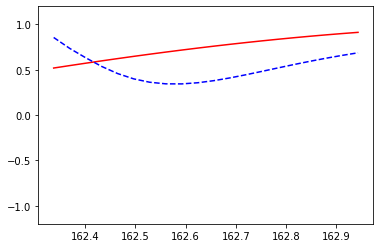

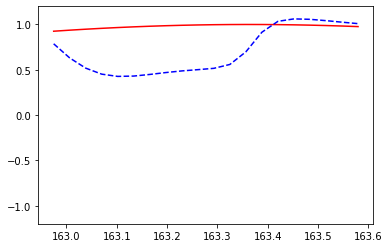

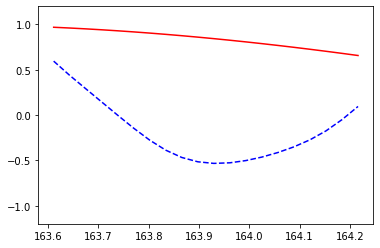

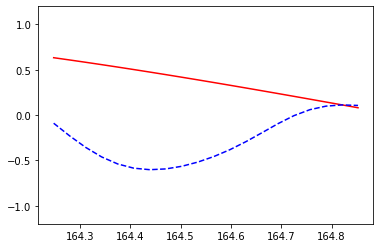

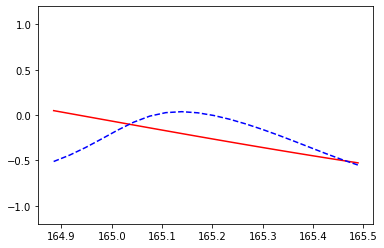

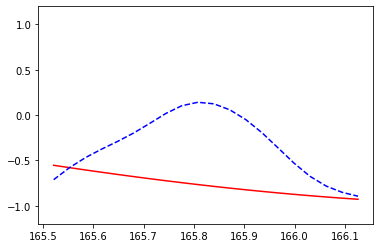

train cost:  0.023596324


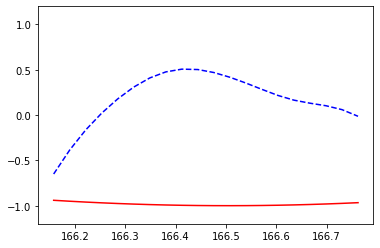

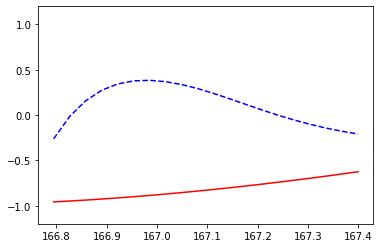

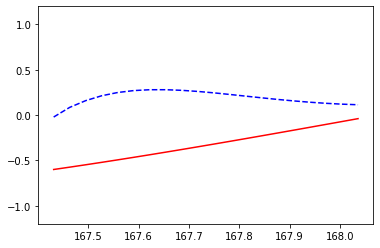

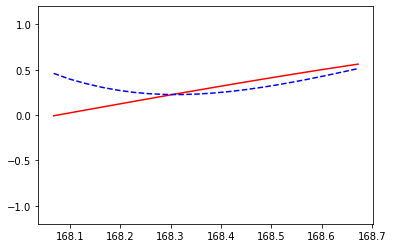

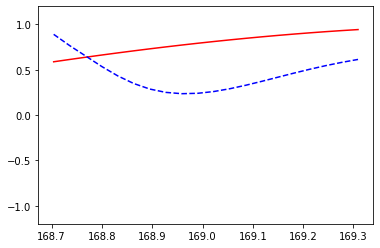

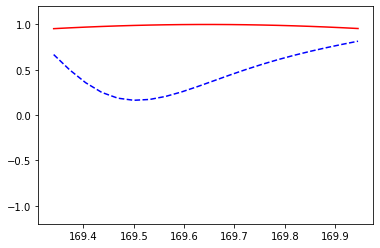

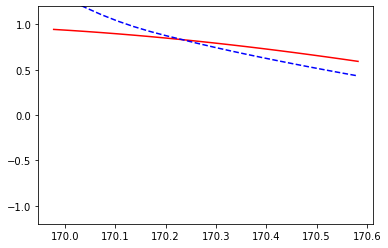

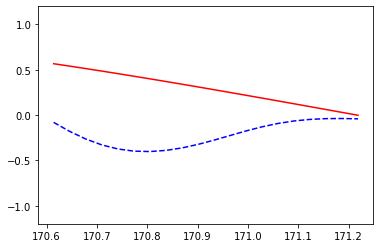

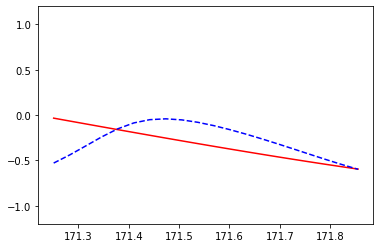

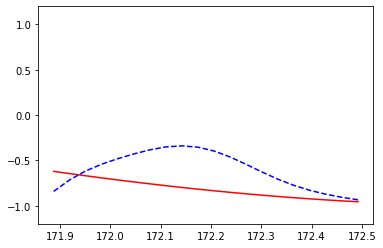

train cost:  0.035578154


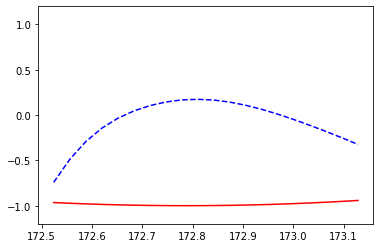

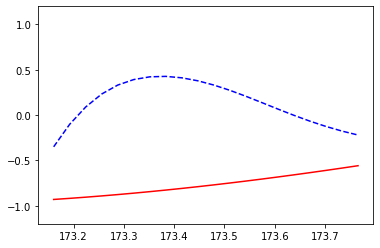

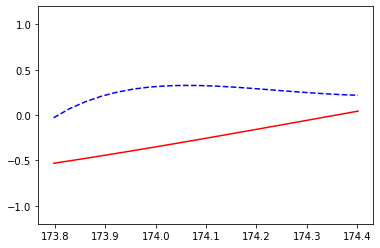

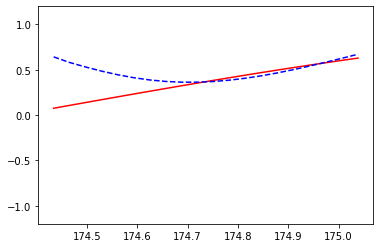

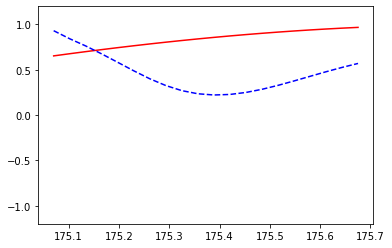

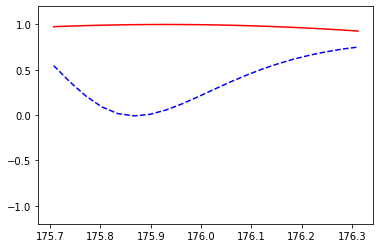

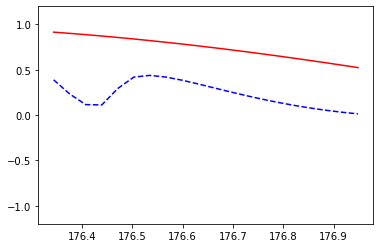

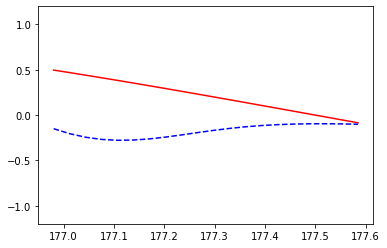

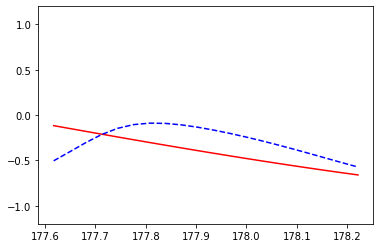

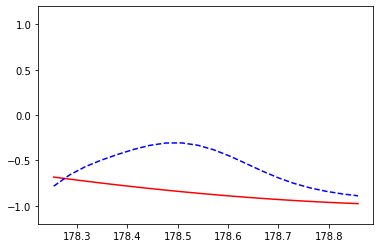

train cost:  0.025518548


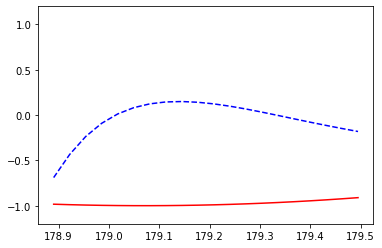

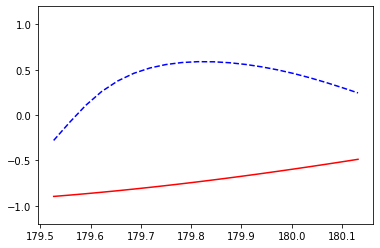

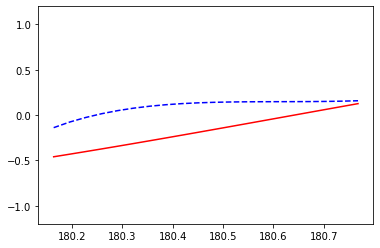

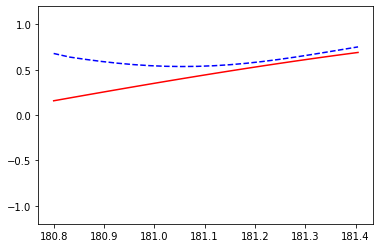

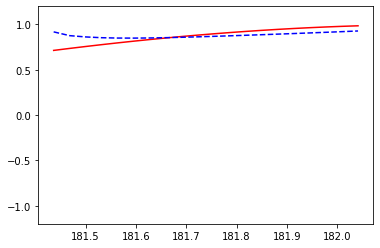

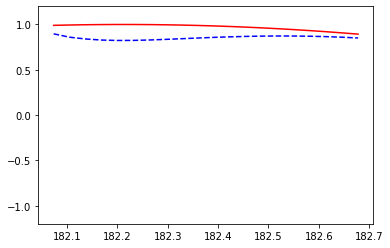

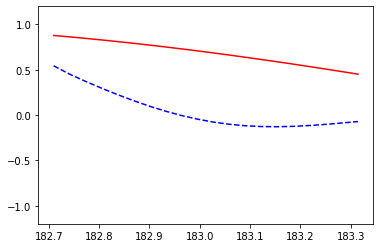

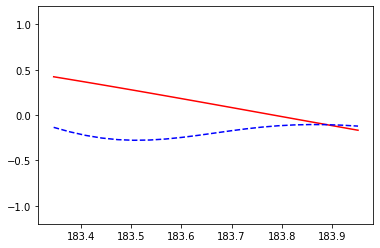

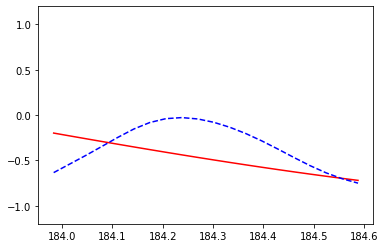

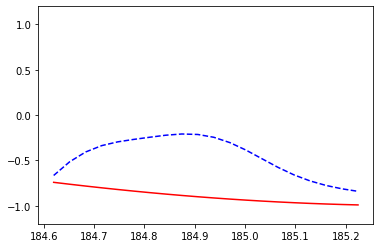

train cost:  0.033807985


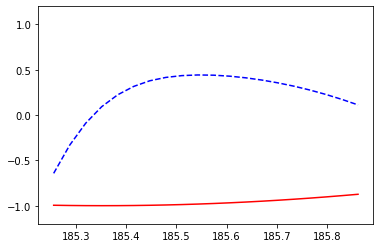

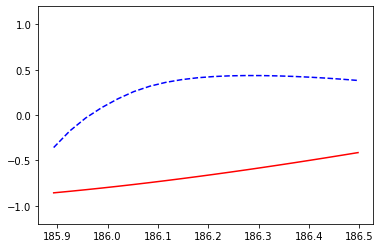

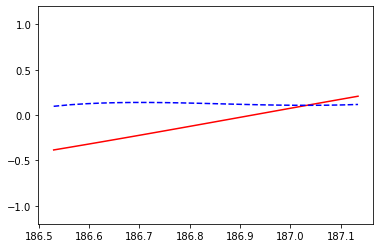

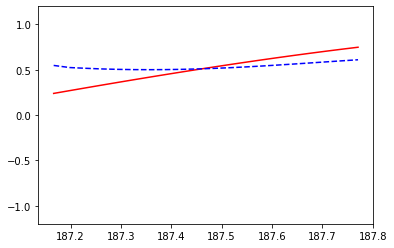

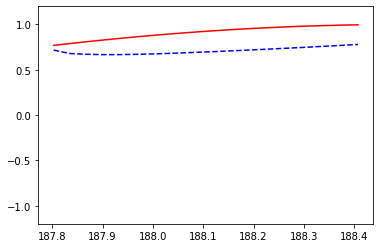

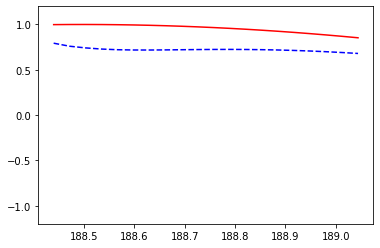

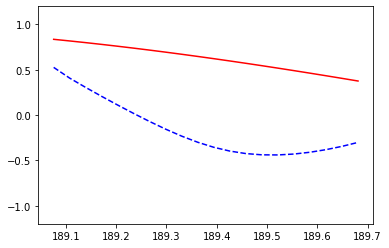

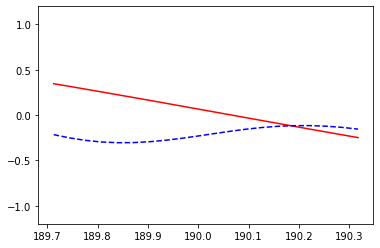

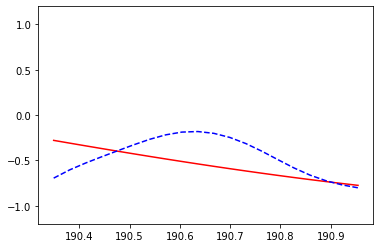

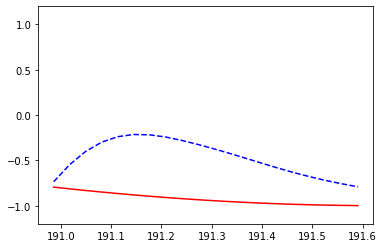

train cost:  0.023543742


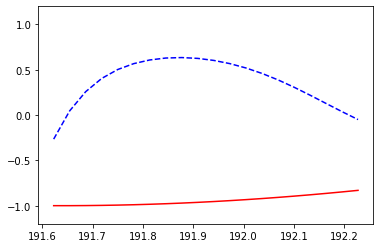

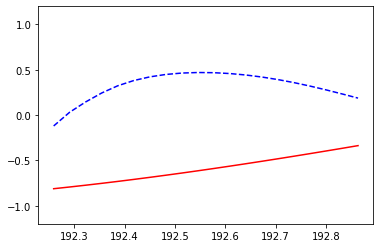

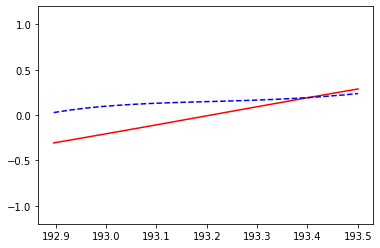

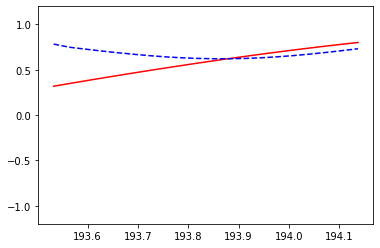

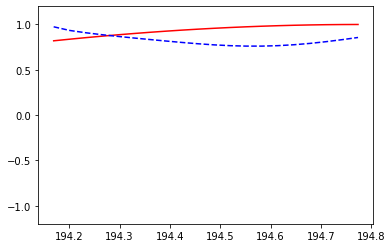

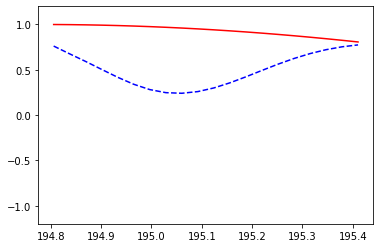

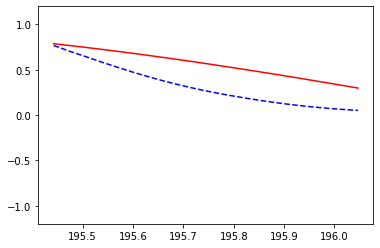

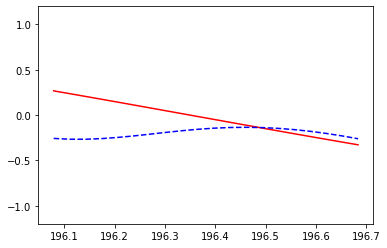

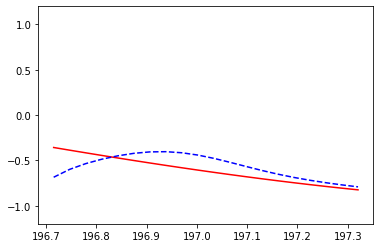

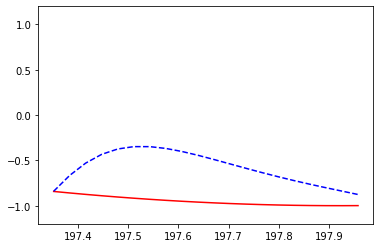

train cost:  0.013494827


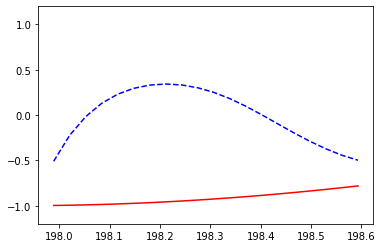

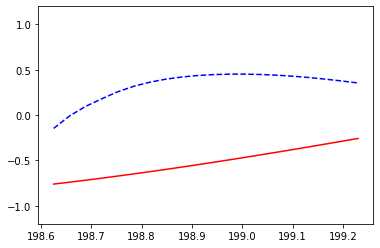

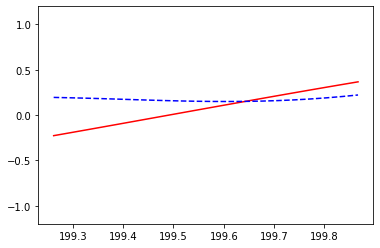

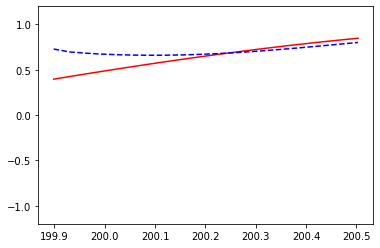

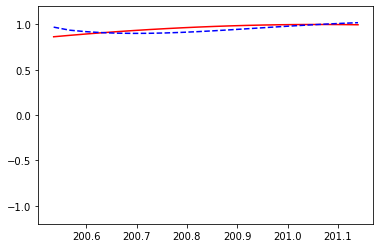

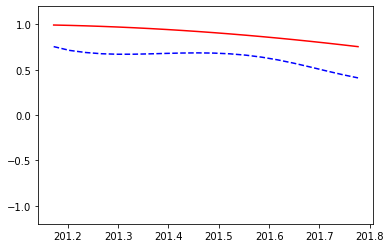

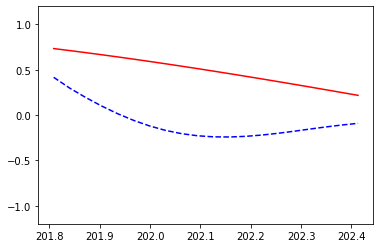

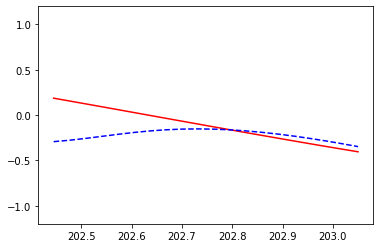

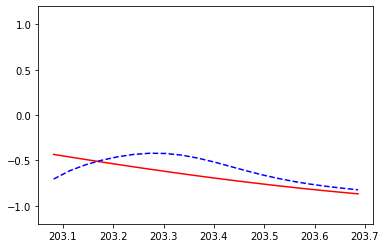

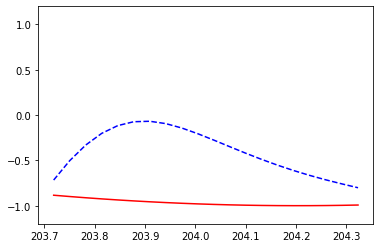

train cost:  0.01882941


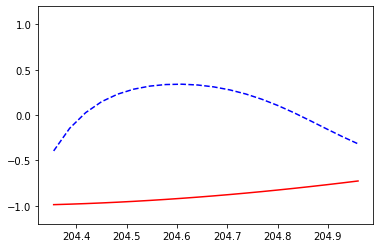

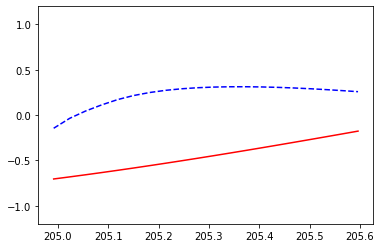

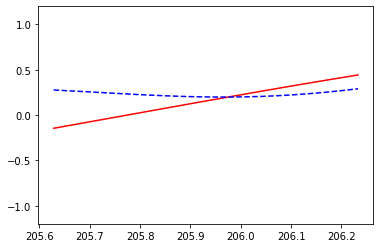

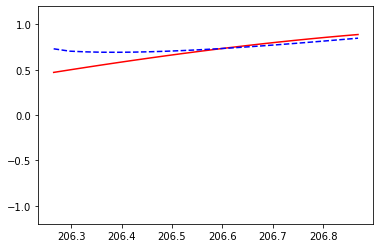

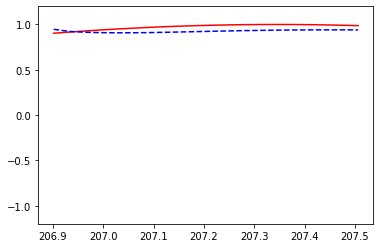

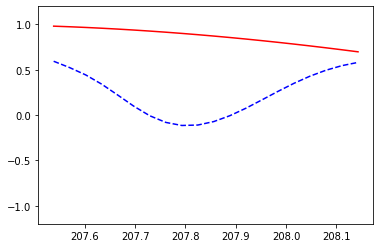

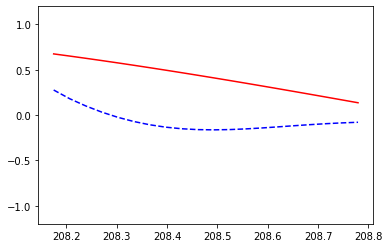

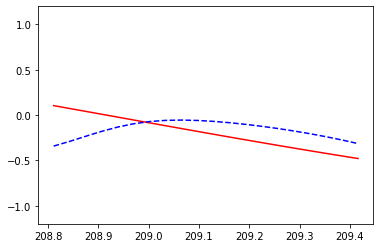

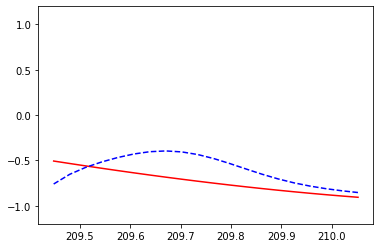

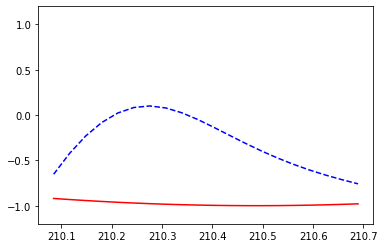

train cost:  0.013742141


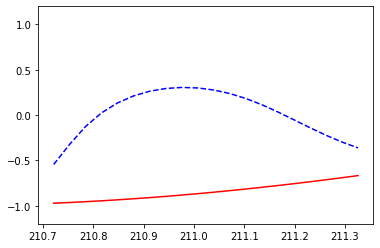

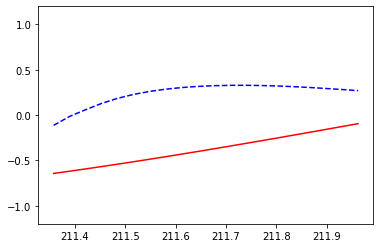

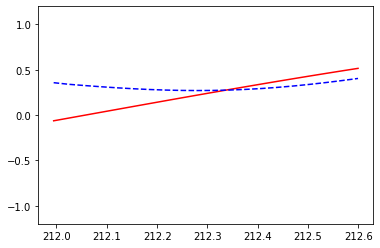

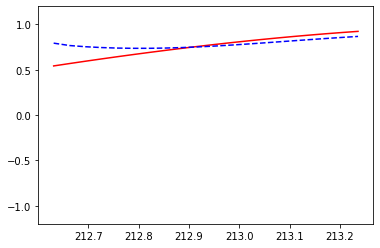

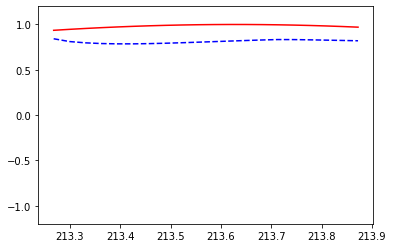

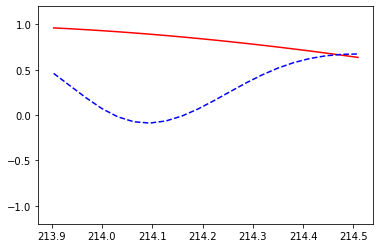

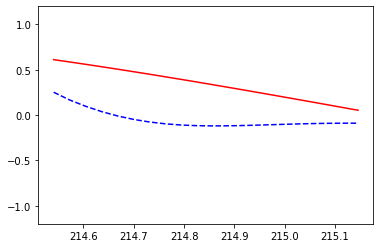

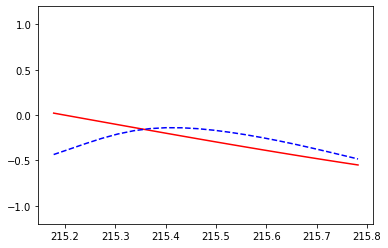

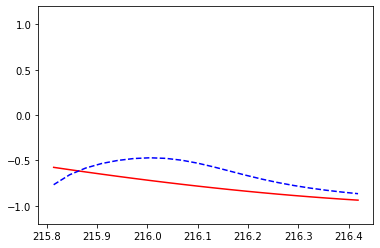

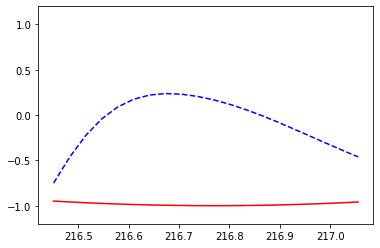

train cost:  0.018375868


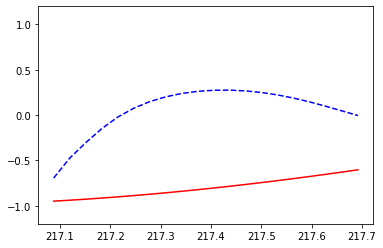

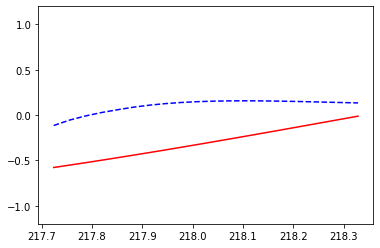

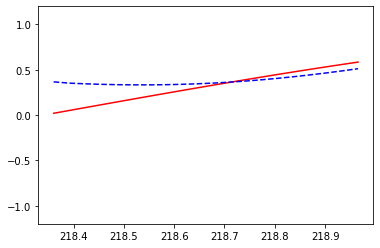

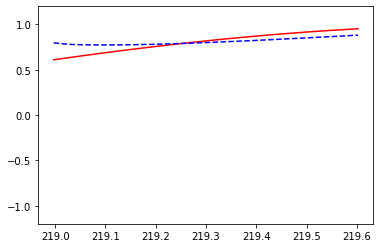

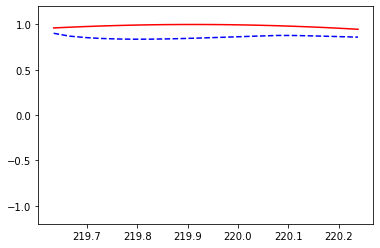

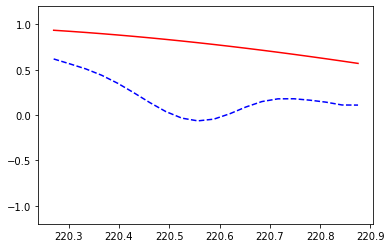

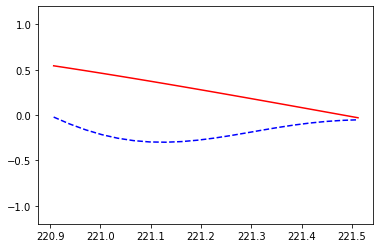

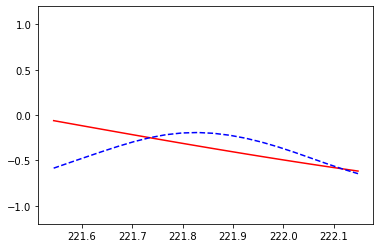

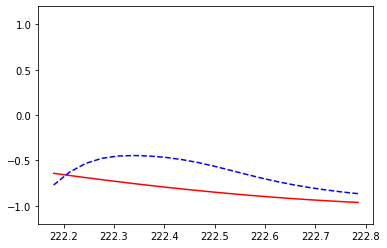

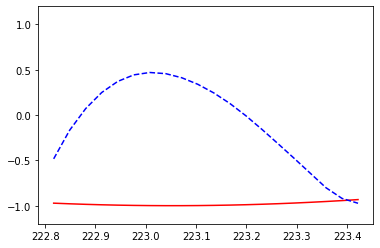

train cost:  0.023970766


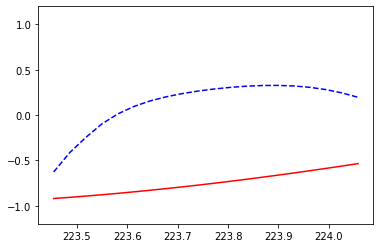

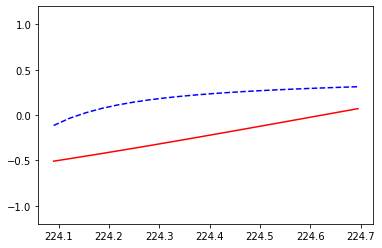

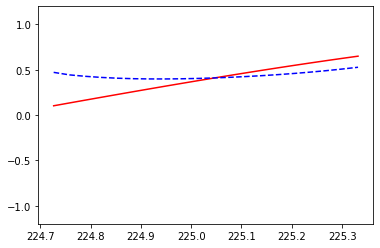

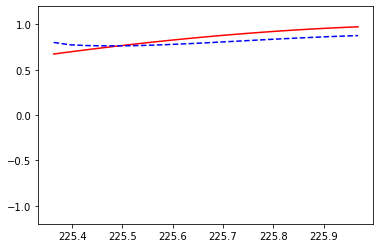

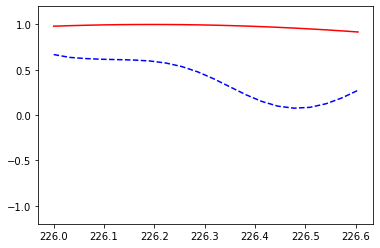

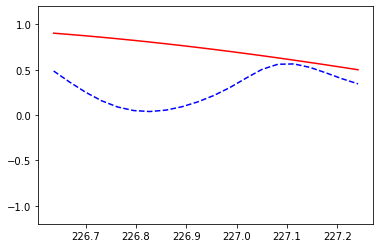

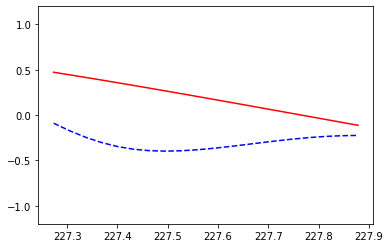

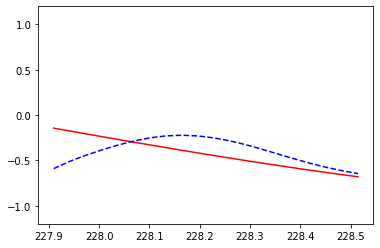

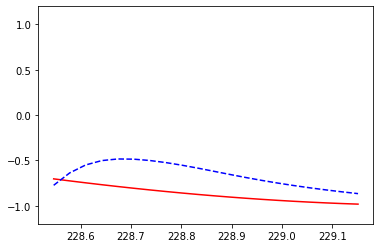

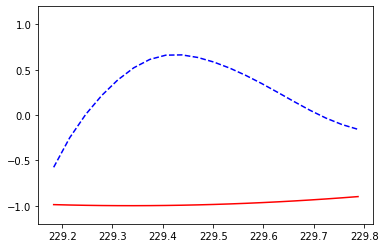

train cost:  0.06953549


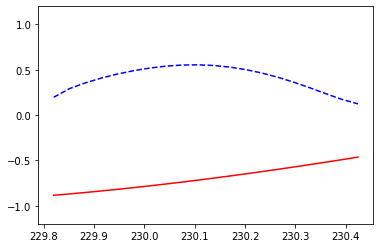

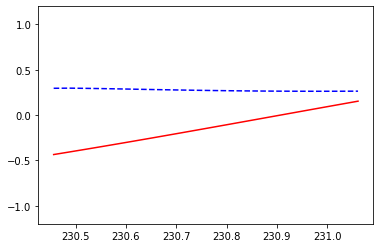

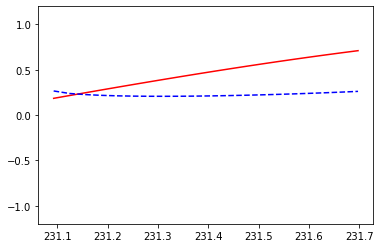

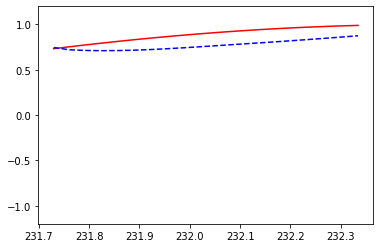

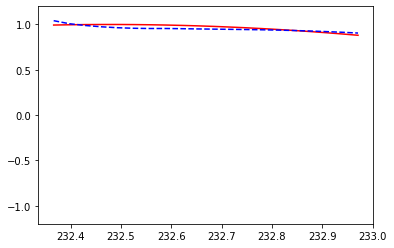

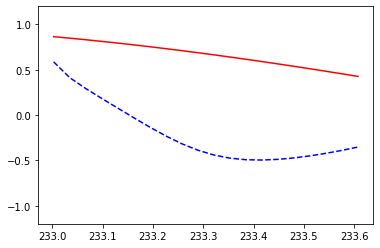

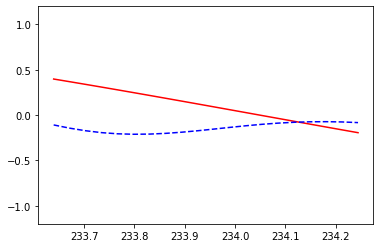

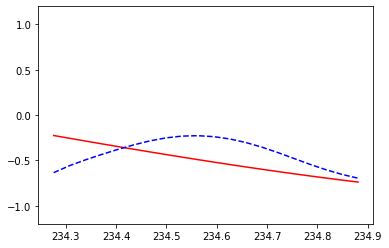

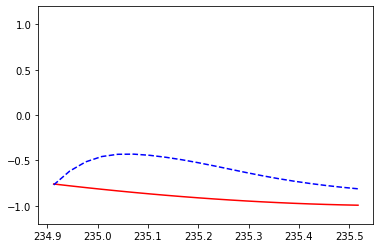

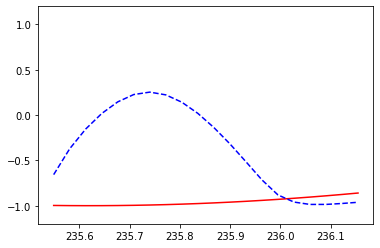

train cost:  0.027318267


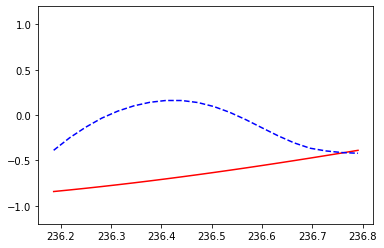

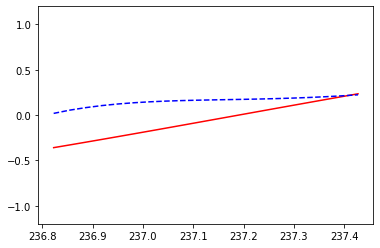

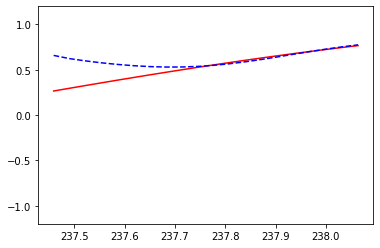

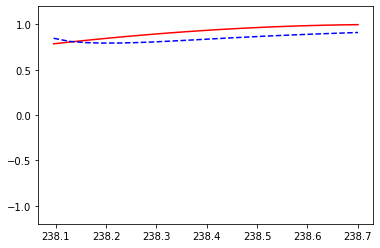

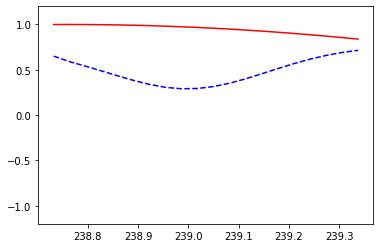

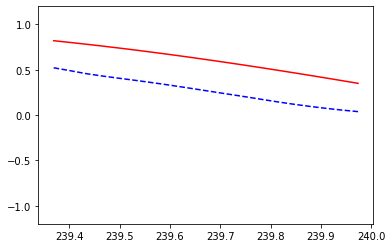

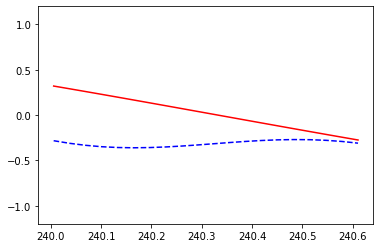

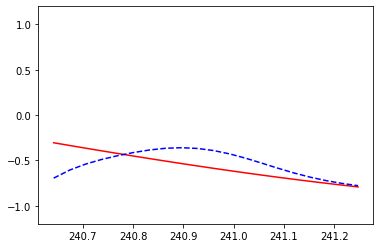

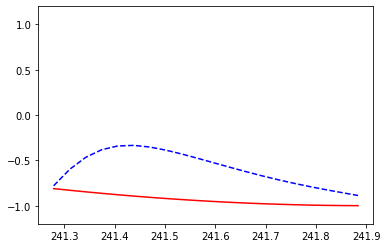

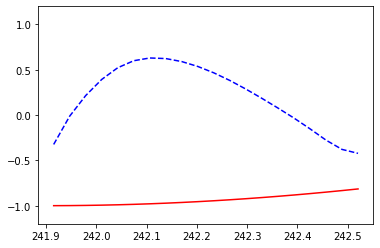

train cost:  0.017438613


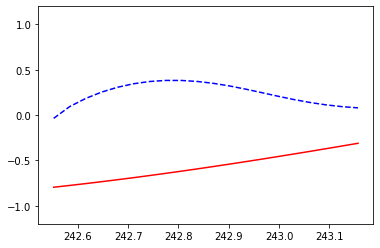

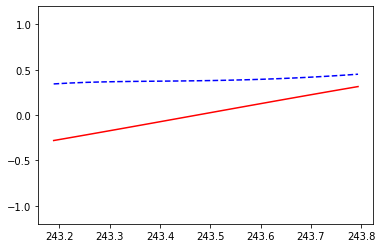

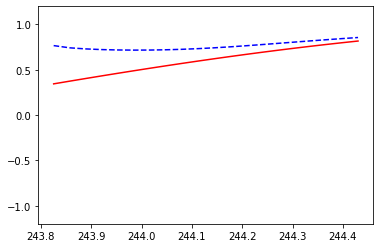

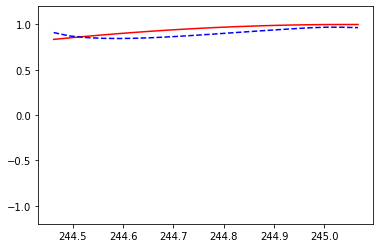

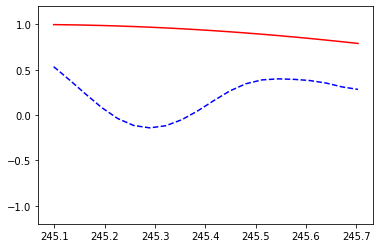

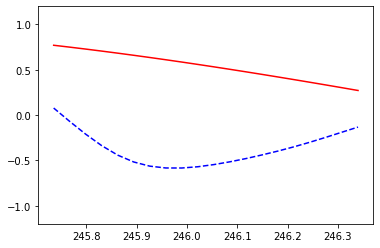

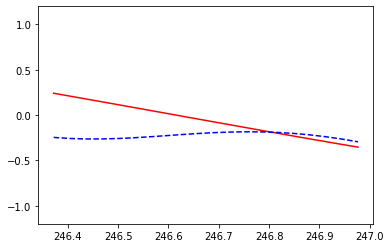

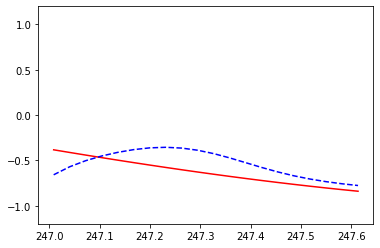

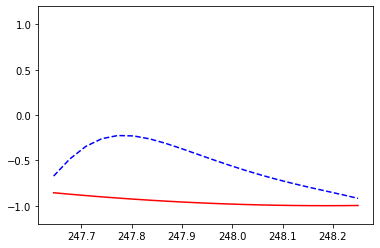

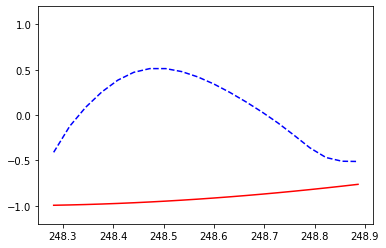

train cost:  0.015665917


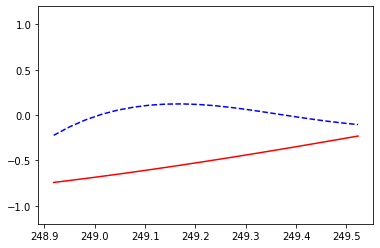

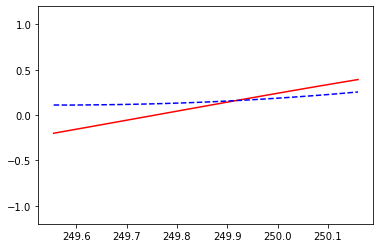

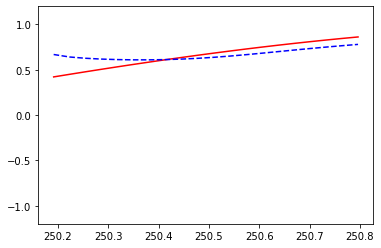

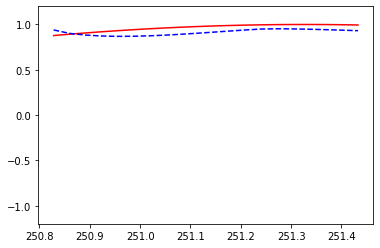

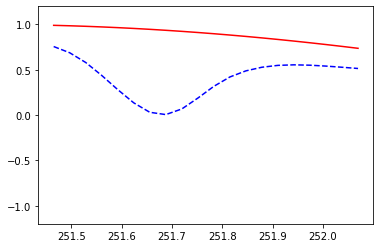

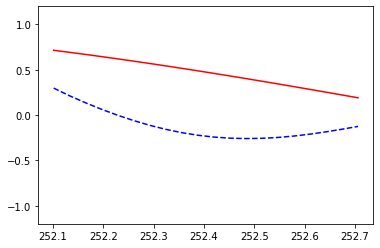

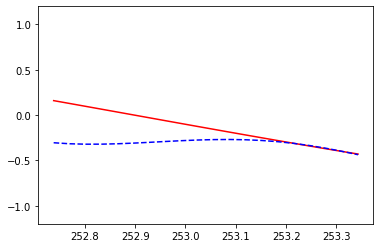

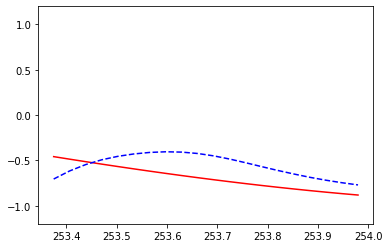

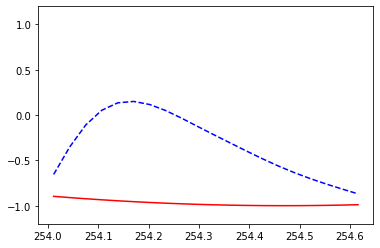

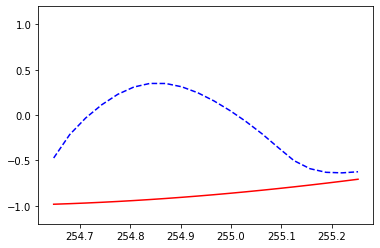

train cost:  0.015901541


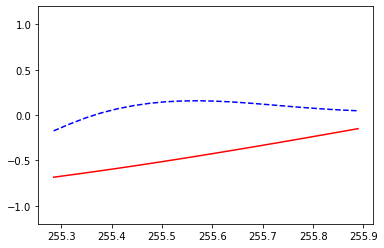

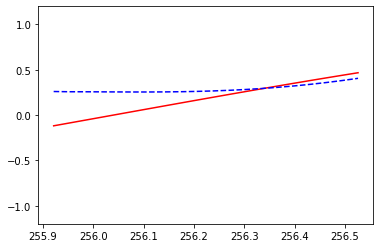

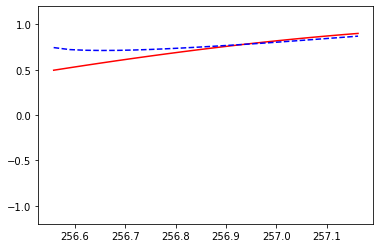

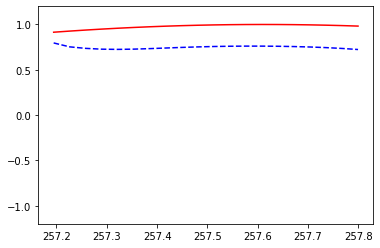

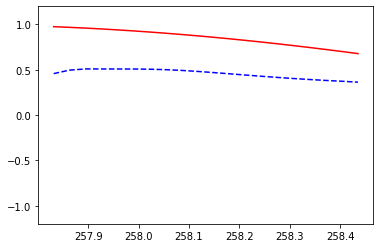

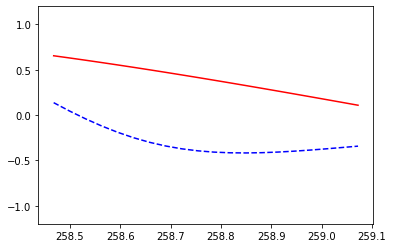

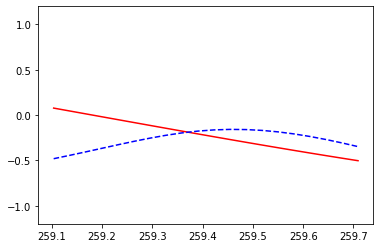

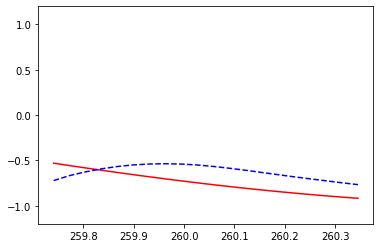

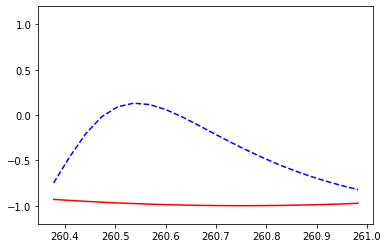

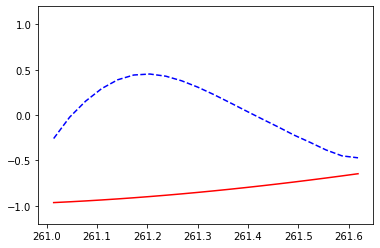

train cost:  0.021015259


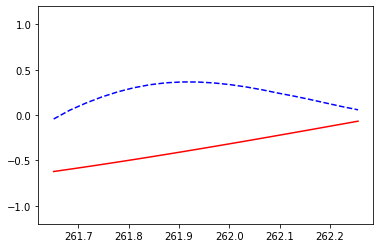

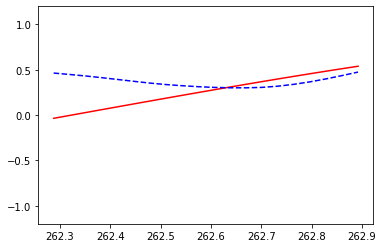

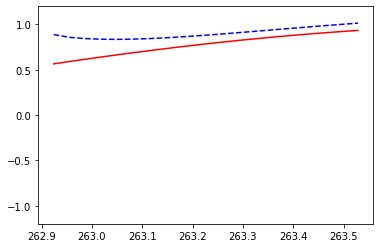

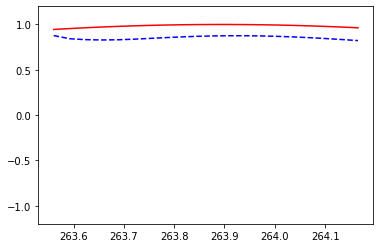

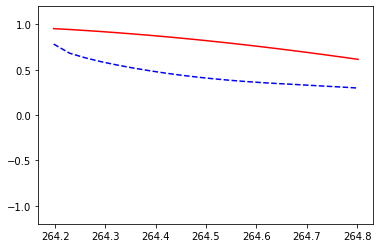

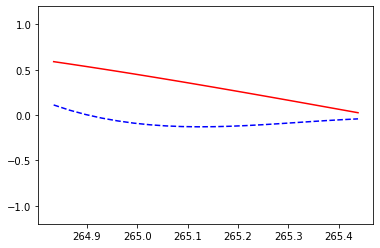

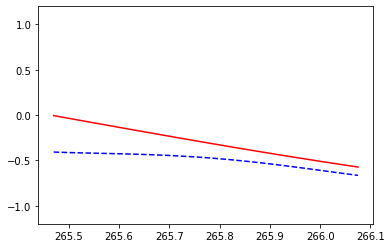

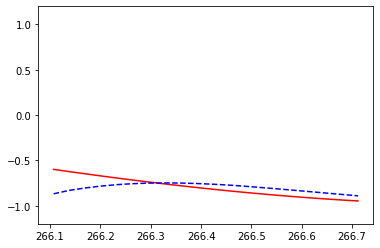

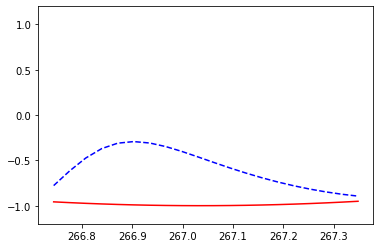

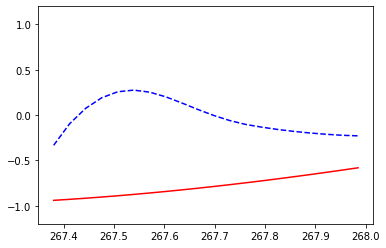

train cost:  0.011738386


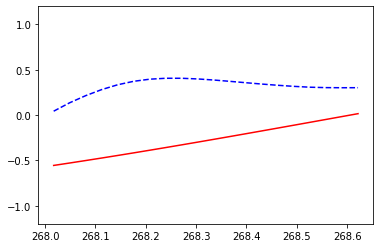

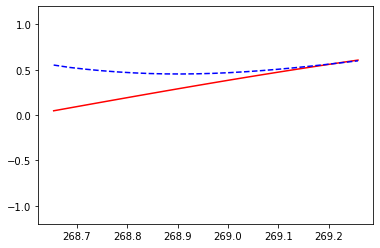

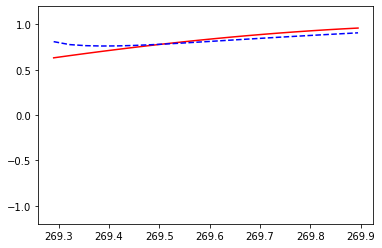

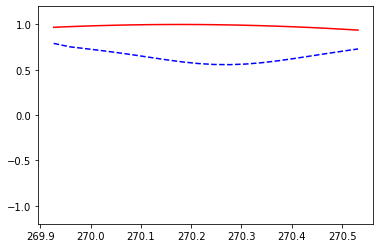

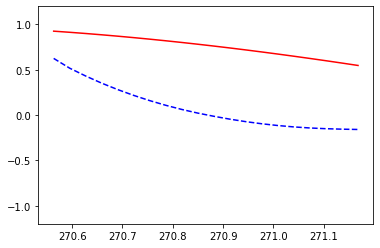

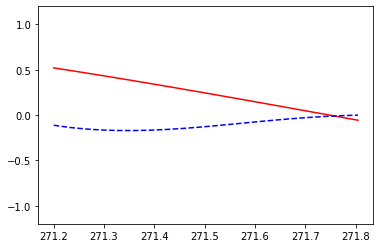

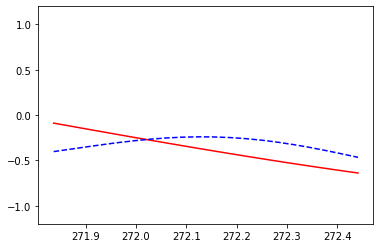

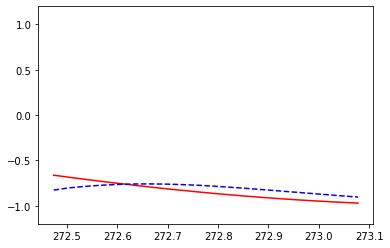

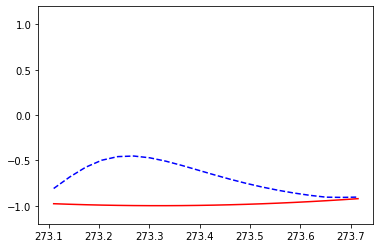

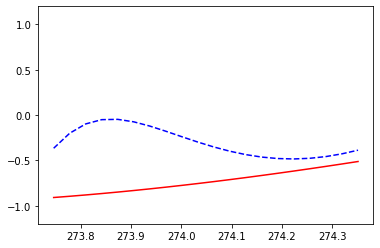

train cost:  0.026473474


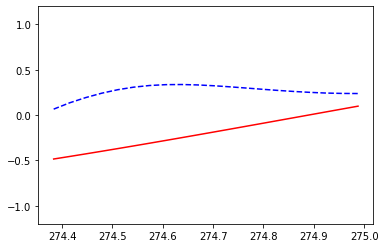

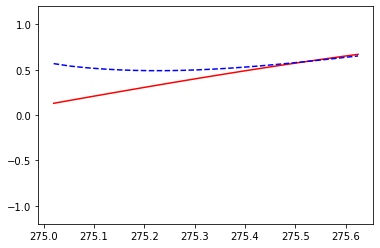

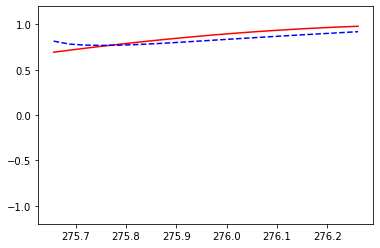

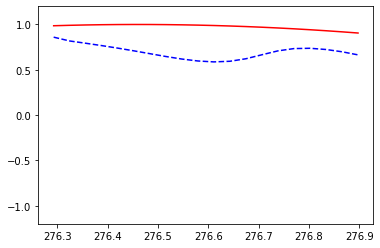

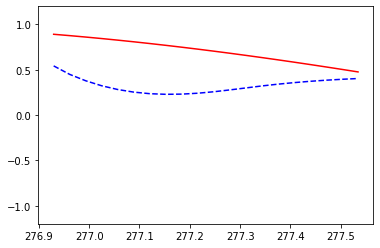

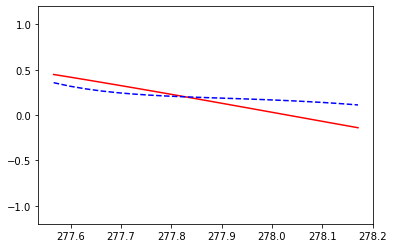

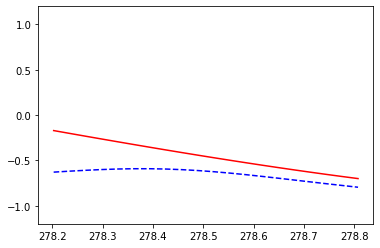

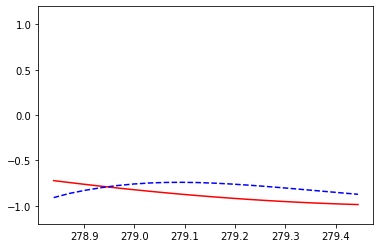

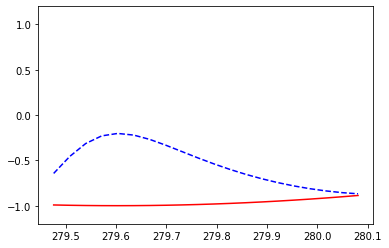

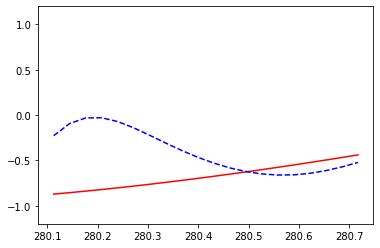

train cost:  0.05067848


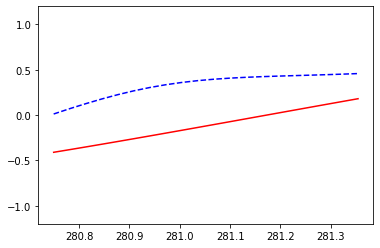

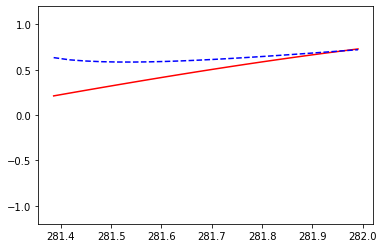

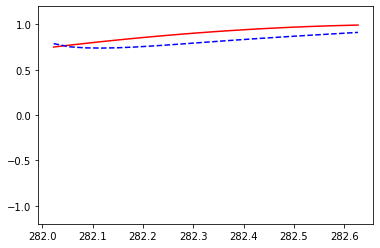

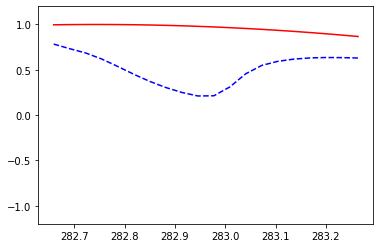

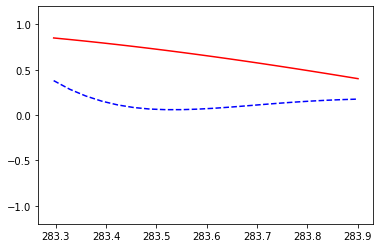

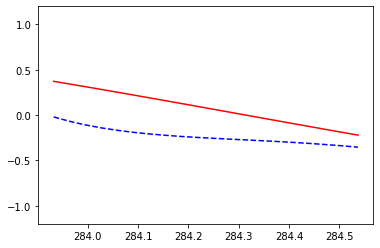

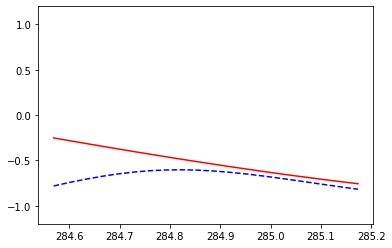

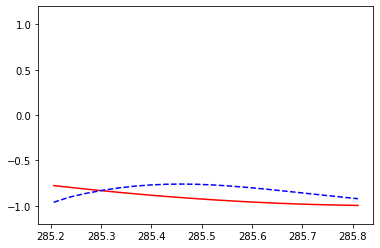

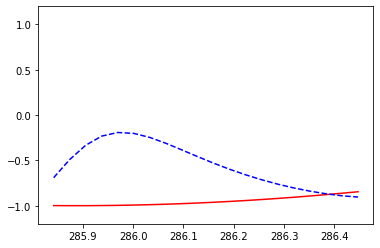

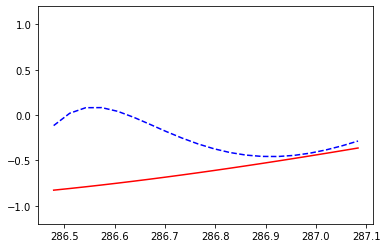

train cost:  0.028742664


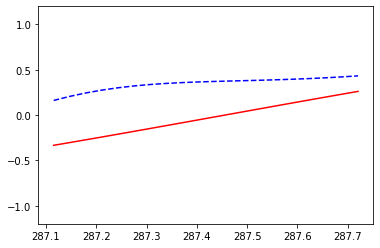

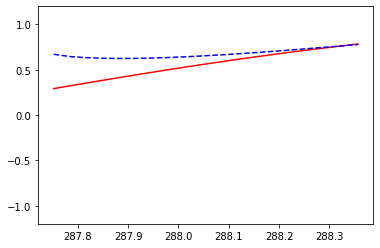

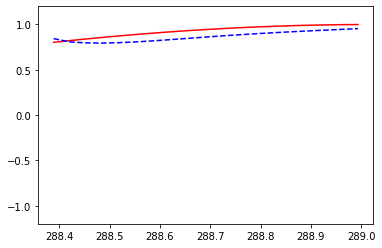

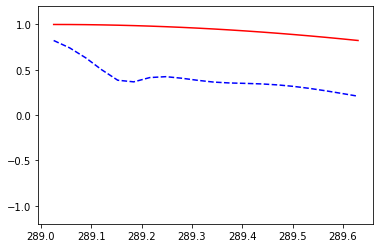

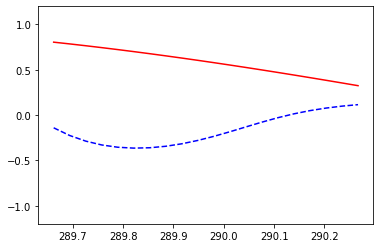

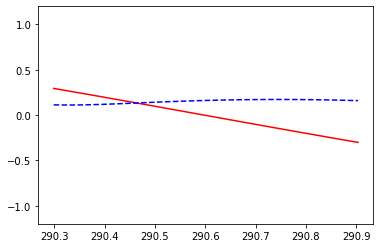

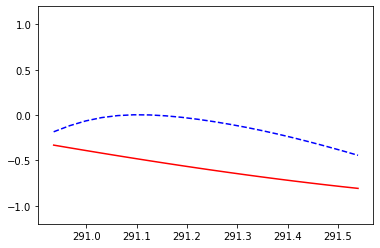

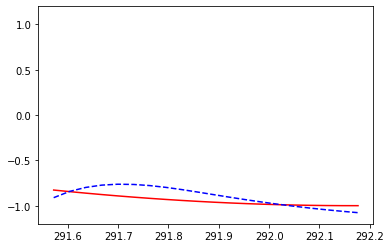

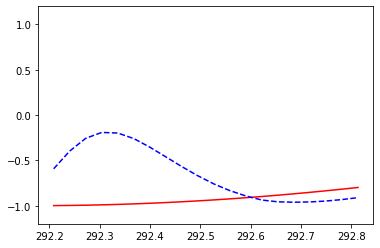

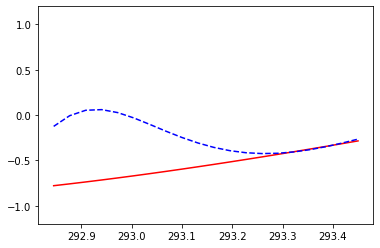

train cost:  0.057441376


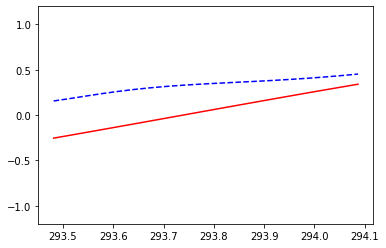

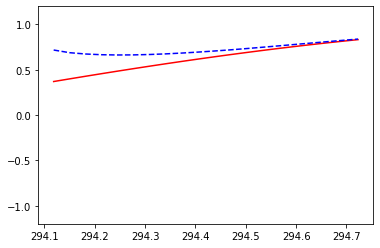

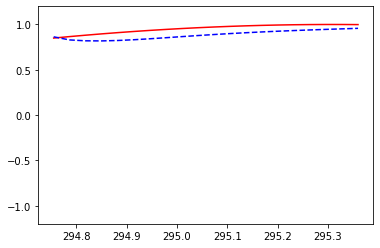

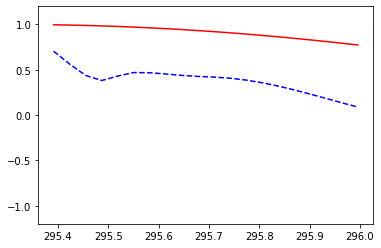

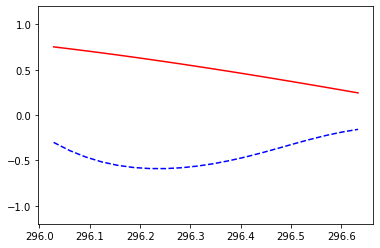

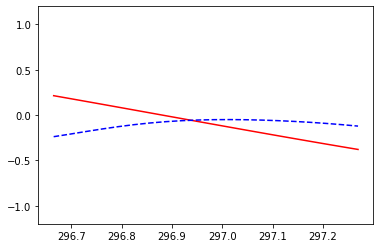

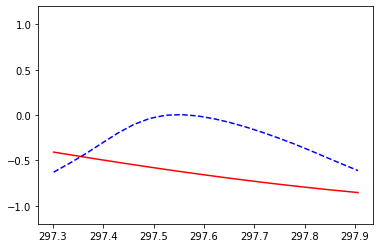

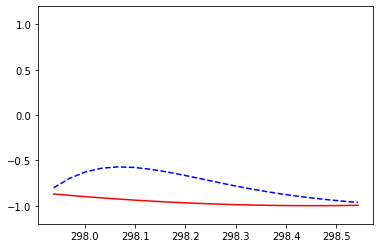

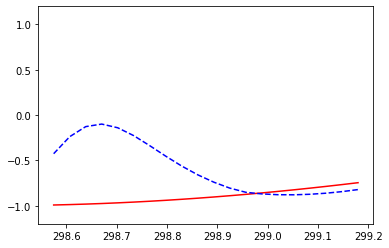

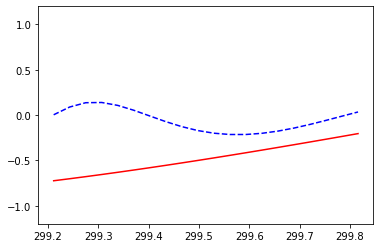

train cost:  0.018868571


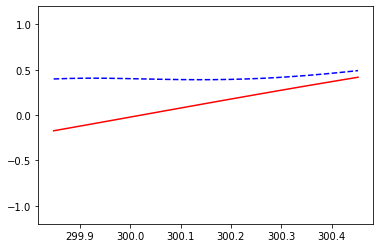

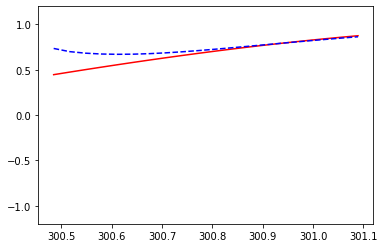

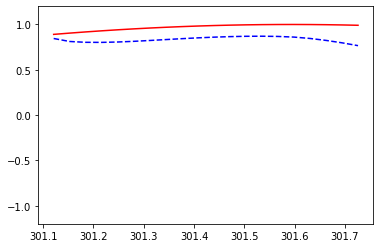

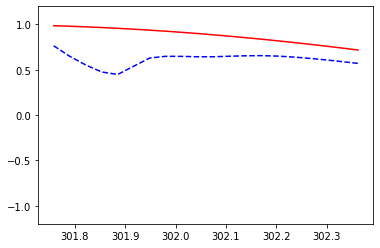

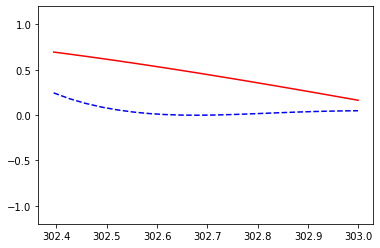

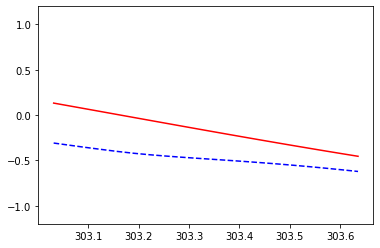

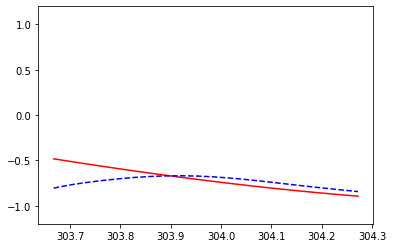

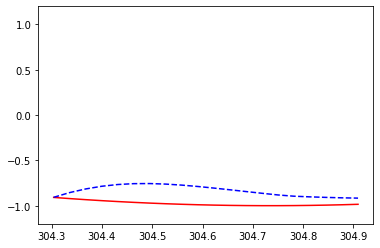

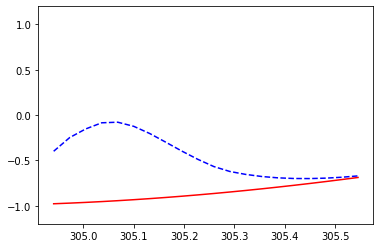

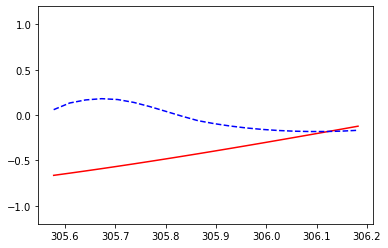

train cost:  0.015398438


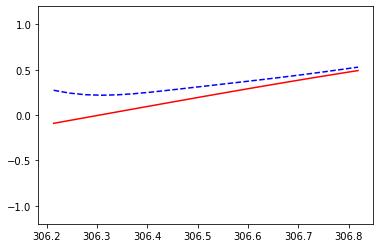

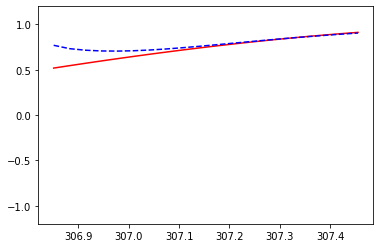

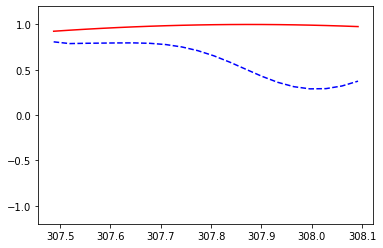

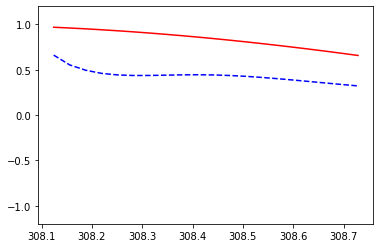

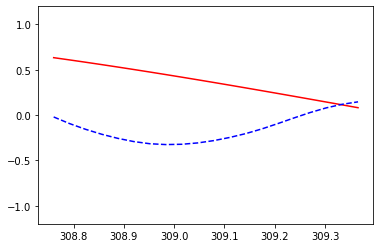

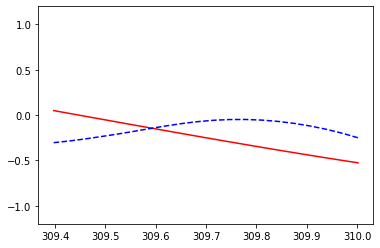

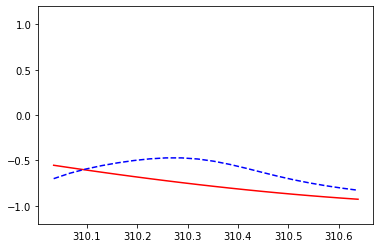

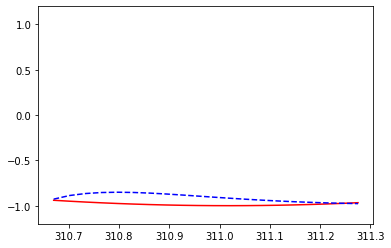

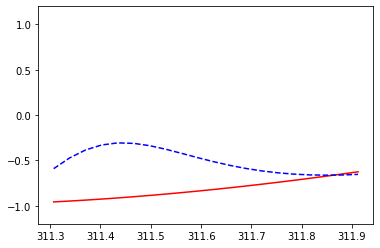

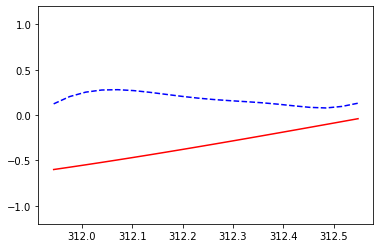

train cost:  0.009369889


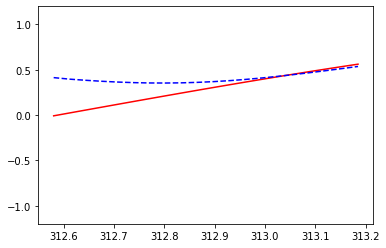

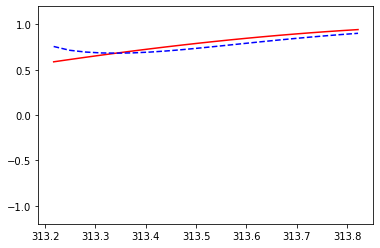

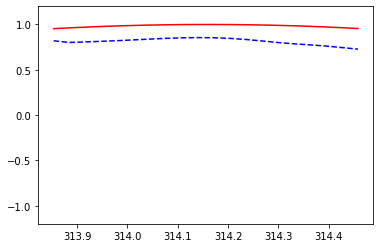

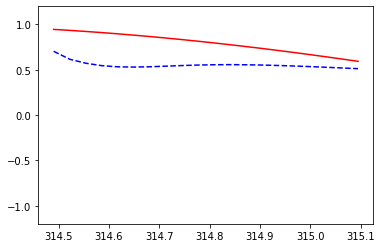

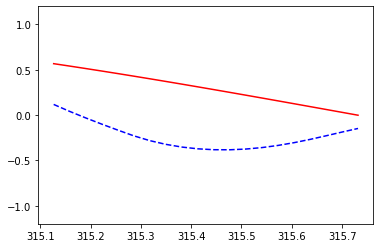

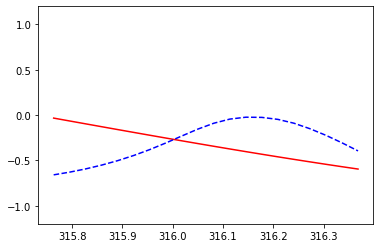

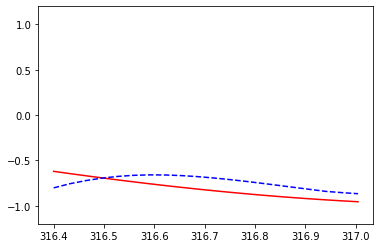

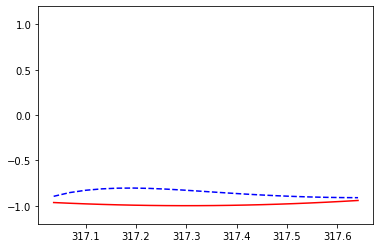

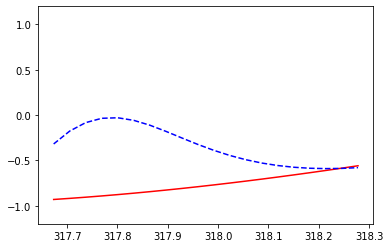

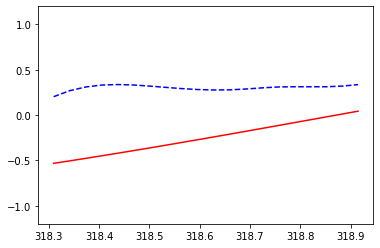

train cost:  0.01426768


In [5]:
print('Training-------------------')
for step in range(501):
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 
             'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)